In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_09_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period       s1a      s1x     s1i  \
datetime                                                                       
2013-03-09 00:10:00  2013-03-09  00:10:00     600   9.82787  11.1452  8.0240   
2013-03-09 00:20:00  2013-03-09  00:20:00     600   9.93344  11.0075  8.4371   
2013-03-09 00:30:00  2013-03-09  00:30:00     600  10.31900  11.0075  8.6666   
2013-03-09 00:40:00  2013-03-09  00:40:00     600  10.30982  11.0993  9.1256   
2013-03-09 00:50:00  2013-03-09  00:50:00     600  10.29146  11.3288  8.4371   

                         s1s       s2a      s2x     s2i  ...  tii  vxa  vxx  \
datetime                                                 ...                  
2013-03-09 00:10:00  0.69309   9.77179  11.0524  7.8853  ...   45  125  125   
2013-03-09 00:20:00  0.50949   9.87277  10.9606  8.2525  ...   45  125  125   
2013-03-09 00:30:00  0.32130  10.24915  10.9147  8.0689  ...   45  125  125   
2013-03-09 00:40:00  0.34425  10.25833  11.1442  9.0787  ...   45  125  125   
2013-03-09 00:50:00  0.49572  10.22161  11.5114  8.4820  ...   45  125  125   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-09 00:10:00  125   83   83   83   83   83   83  
2013-03-09 00:20:00  125   83   83   83   83   83   83  
2013-03-09 00:30:00  125   83   83   83   83   83   83  
2013-03-09 00:40:00  125   83   83   83   83   83   83  
2013-03-09 00:50:00  125   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       8.076881
std        3.961625
min        1.070150
25%        3.845953
50%        9.557060
75%       11.279457
max       14.385740
Name: s1a, dtype: float64


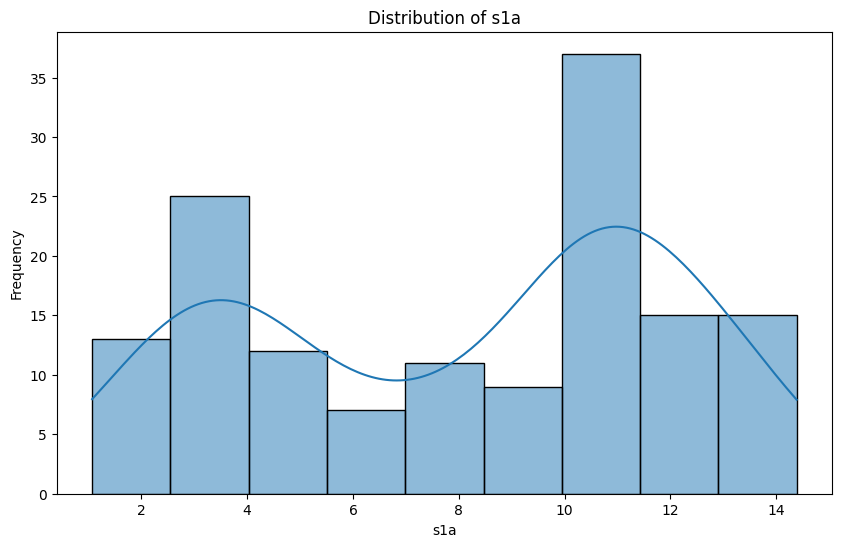


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean       9.447538
std        4.607319
min        1.414400
25%        4.524125
50%       10.778000
75%       13.187750
max       17.112200
Name: s1x, dtype: float64


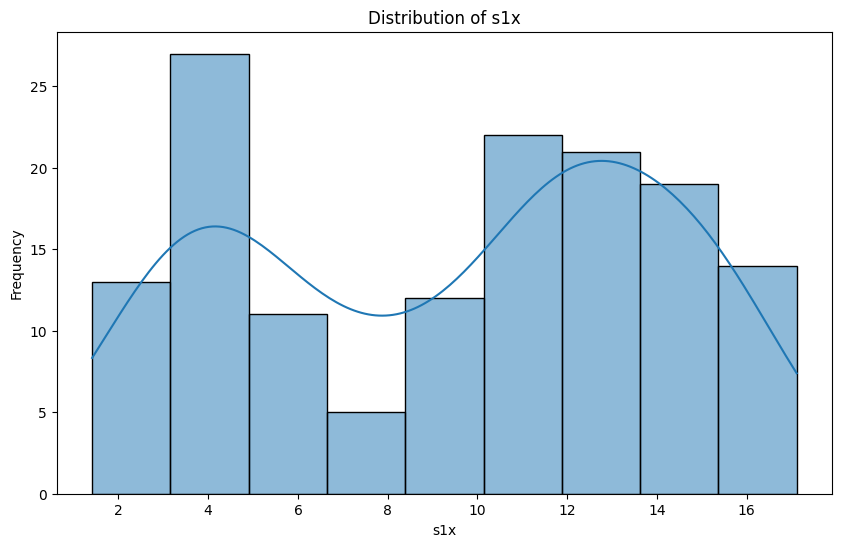


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       6.364587
std        3.112192
min        0.680000
25%        3.158600
50%        7.289600
75%        8.999375
max       11.466500
Name: s1i, dtype: float64


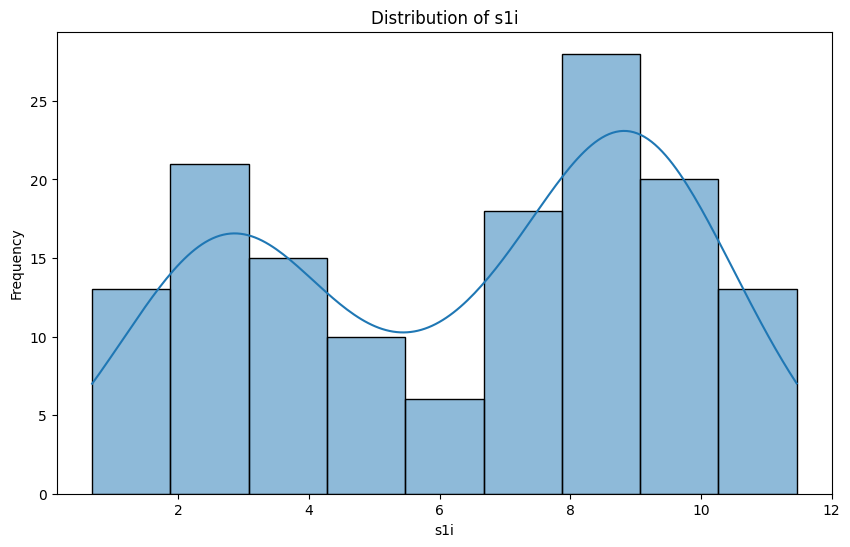


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.590102
std        0.351072
min        0.119340
25%        0.321300
50%        0.479655
75%        0.822758
max        1.739610
Name: s1s, dtype: float64


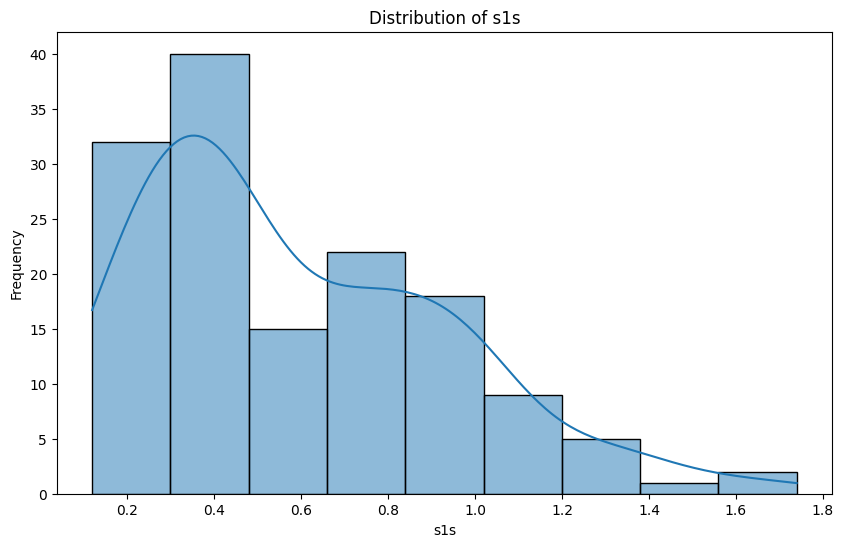


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       8.027080
std        3.944843
min        1.027840
25%        3.844952
50%        9.517045
75%       11.207313
max       14.315890
Name: s2a, dtype: float64


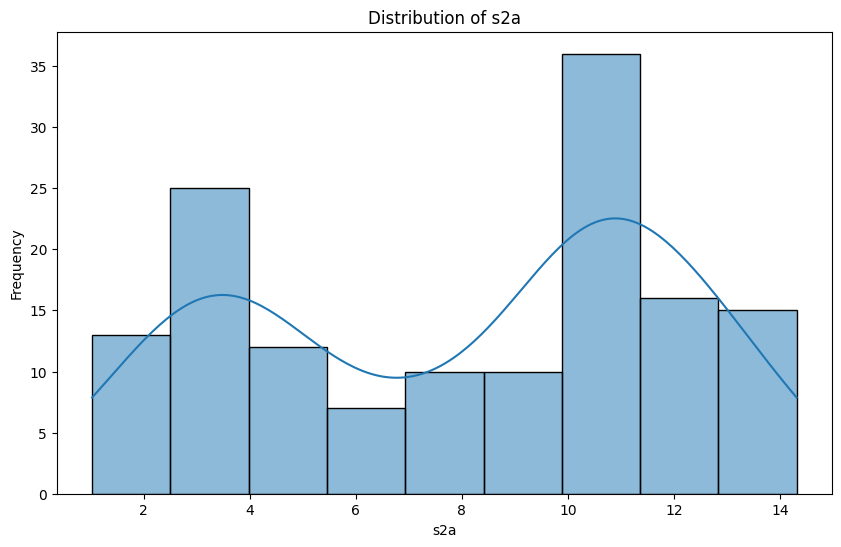


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean       9.411794
std        4.614329
min        1.413400
25%        4.569025
50%       10.777000
75%       13.083475
max       16.698100
Name: s2x, dtype: float64


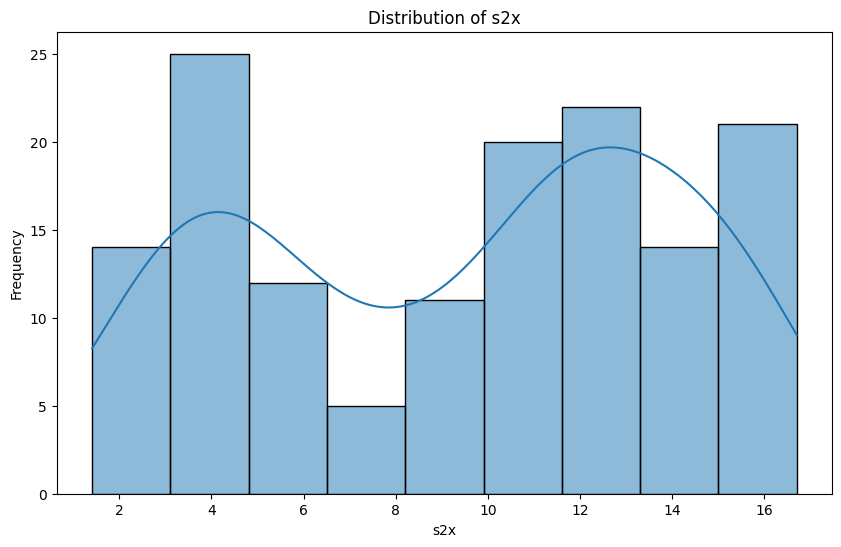


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       6.293144
std        3.062342
min        0.724900
25%        3.226450
50%        7.127950
75%        8.906575
max       11.465500
Name: s2i, dtype: float64


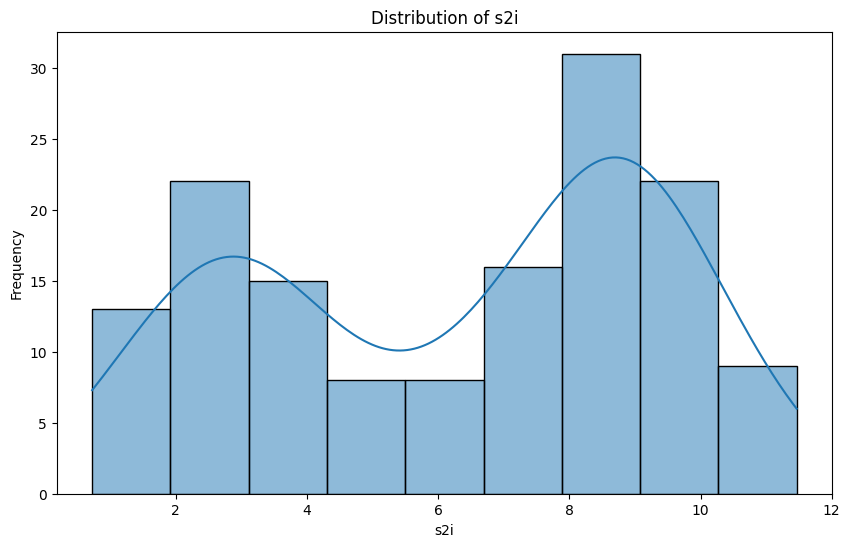


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.594150
std        0.355826
min        0.110160
25%        0.322447
50%        0.486540
75%        0.843413
max        1.767150
Name: s2s, dtype: float64


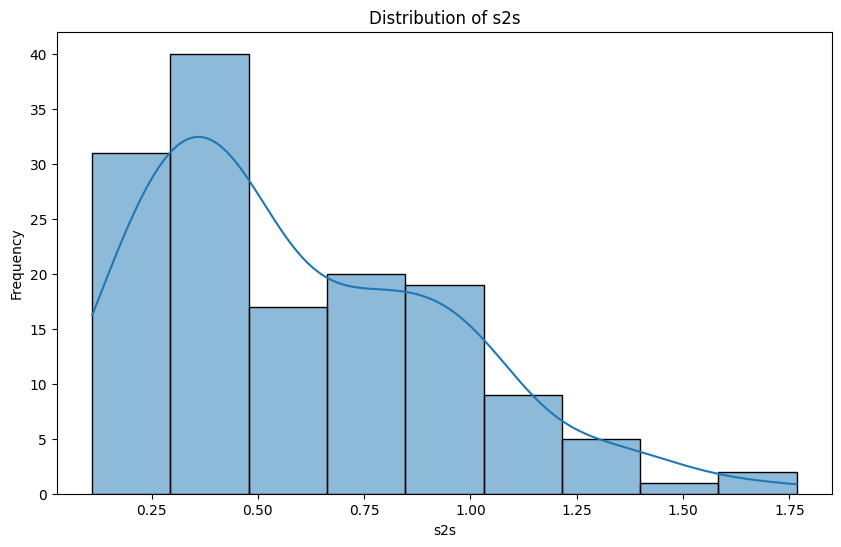


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       7.560640
std        3.850908
min        0.810140
25%        3.582977
50%        9.208930
75%       10.738695
max       13.575760
Name: s3a, dtype: float64


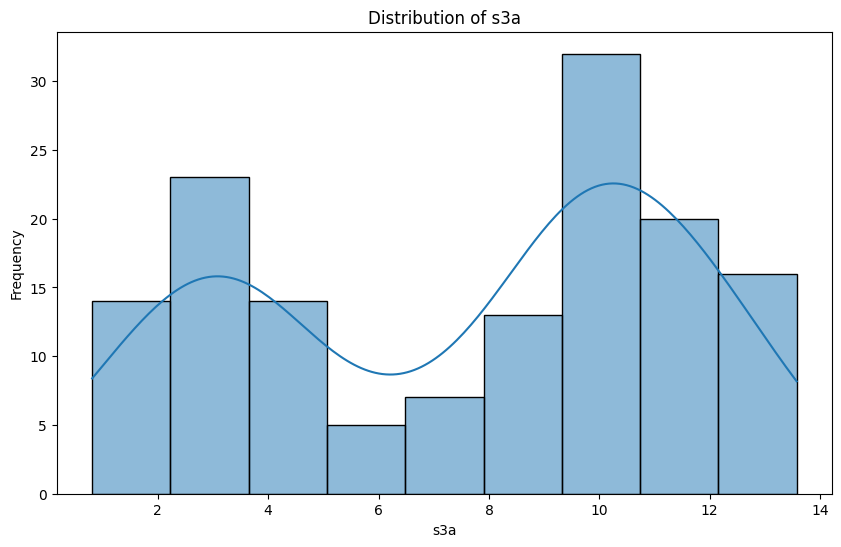


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean       9.019847
std        4.584717
min        1.048660
25%        4.374235
50%       10.543750
75%       12.791380
max       16.460980
Name: s3x, dtype: float64


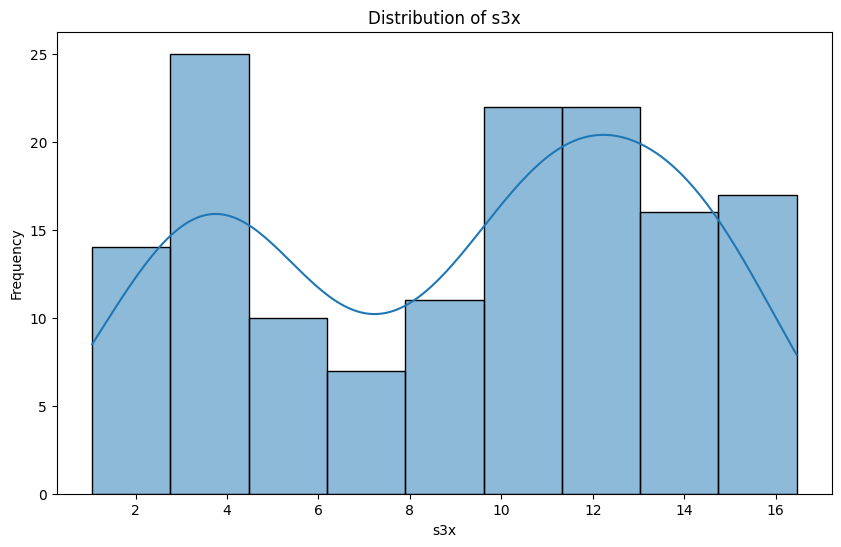


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       5.721985
std        2.918693
min        0.589960
25%        2.871993
50%        6.667735
75%        8.169977
max       10.635490
Name: s3i, dtype: float64


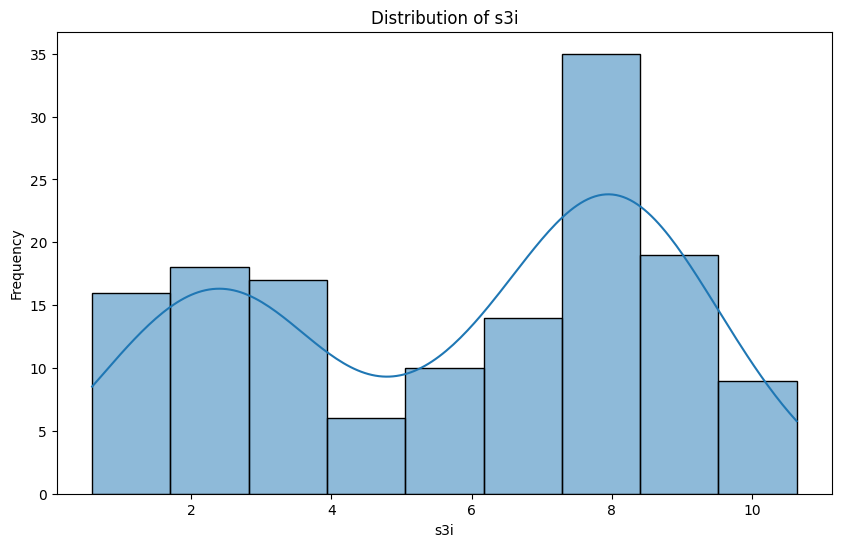


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.631955
std        0.365222
min        0.073390
25%        0.342875
50%        0.561905
75%        0.885288
max        1.738470
Name: s3s, dtype: float64


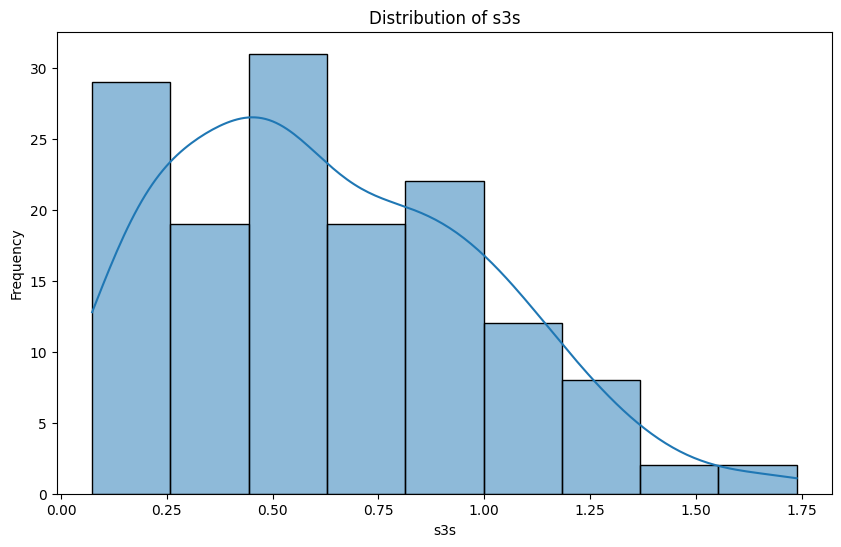


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean     258.416667
std       94.445567
min       16.000000
25%      290.000000
50%      293.000000
75%      299.250000
max      359.000000
Name: d1a, dtype: float64


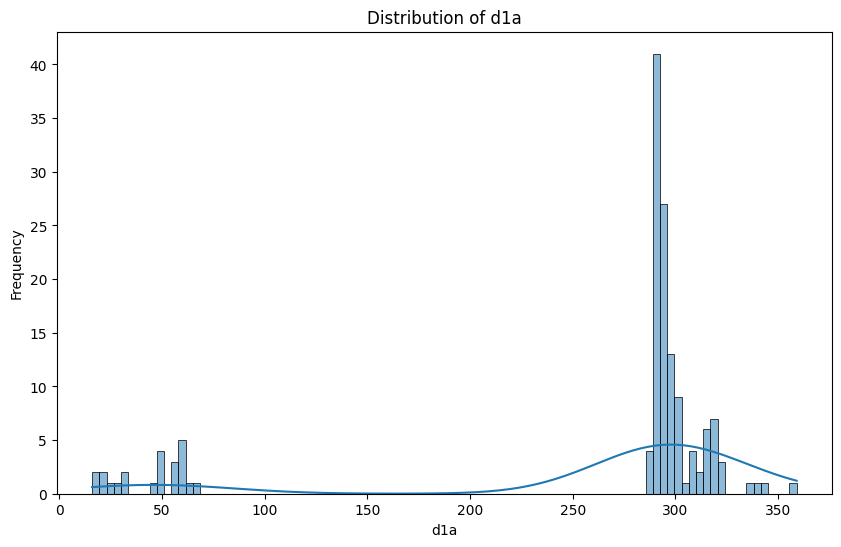


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       3.847222
std        1.926334
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max       18.000000
Name: d1s, dtype: float64


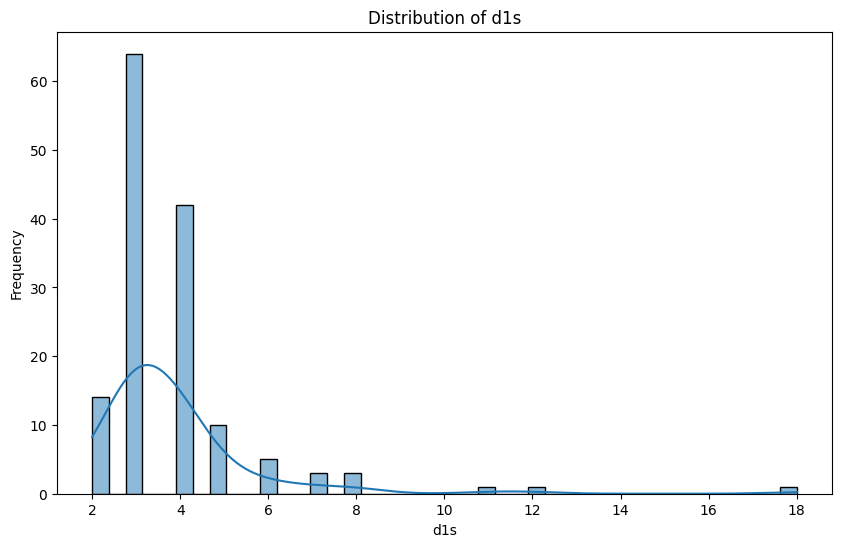


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean     253.381944
std       97.022310
min        5.000000
25%      287.000000
50%      290.000000
75%      295.000000
max      347.000000
Name: d2a, dtype: float64


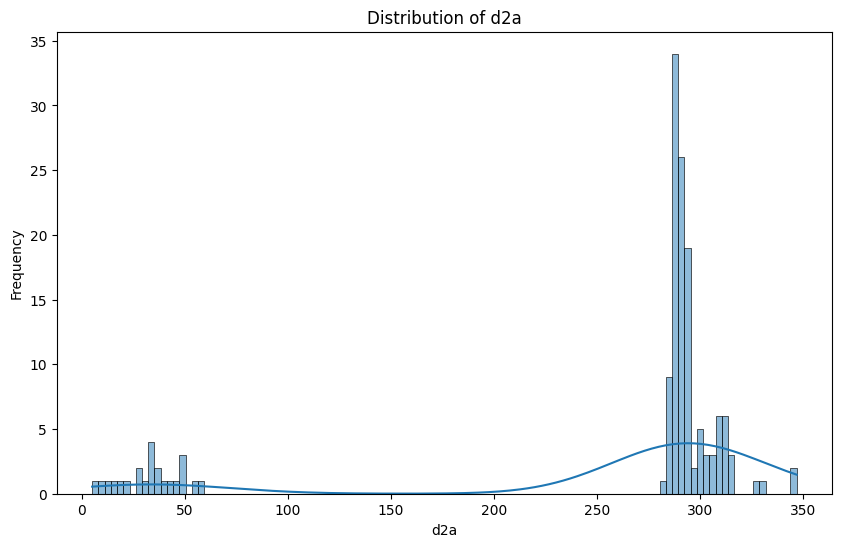


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       5.993056
std        3.310286
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       30.000000
Name: d2s, dtype: float64


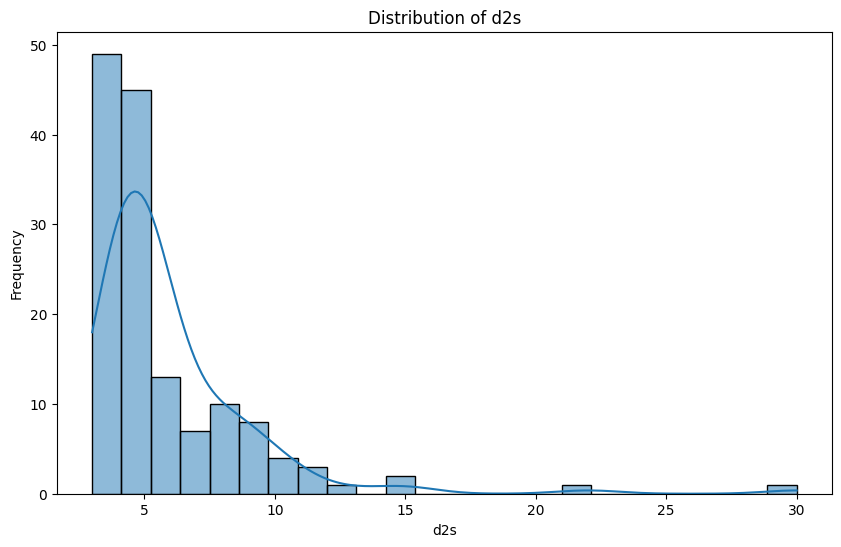


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean     104.416667
std        1.653562
min       99.000000
25%      104.000000
50%      105.000000
75%      106.000000
max      106.000000
Name: h1a, dtype: float64


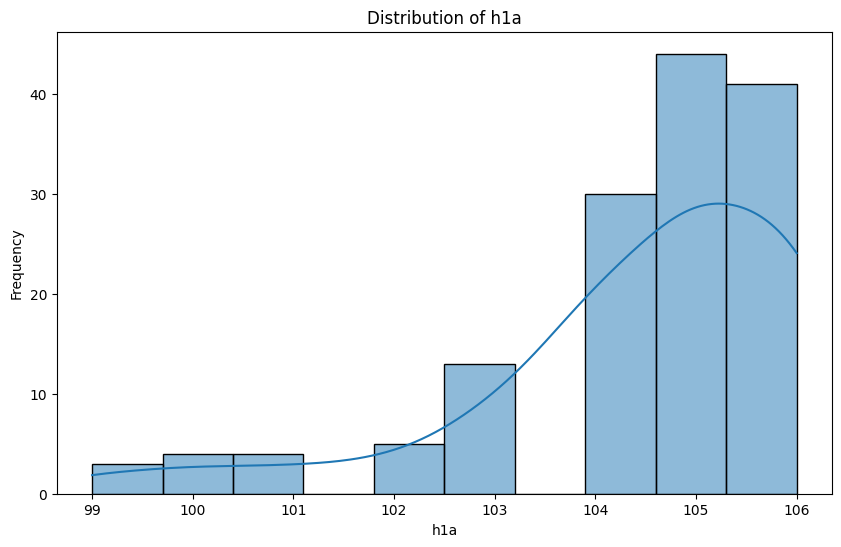


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean     104.701389
std        1.439113
min       99.000000
25%      104.000000
50%      105.000000
75%      106.000000
max      106.000000
Name: h1x, dtype: float64


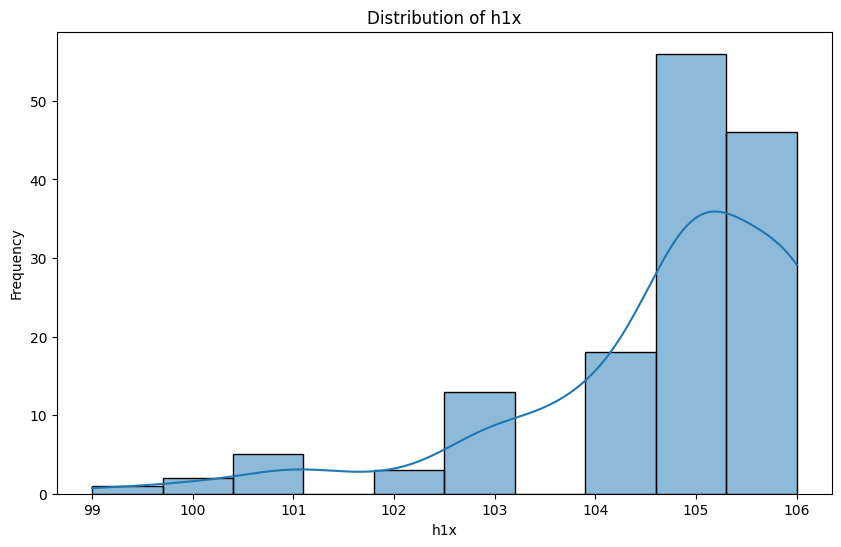


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean     104.159722
std        1.796123
min       98.000000
25%      104.000000
50%      105.000000
75%      105.000000
max      106.000000
Name: h1i, dtype: float64


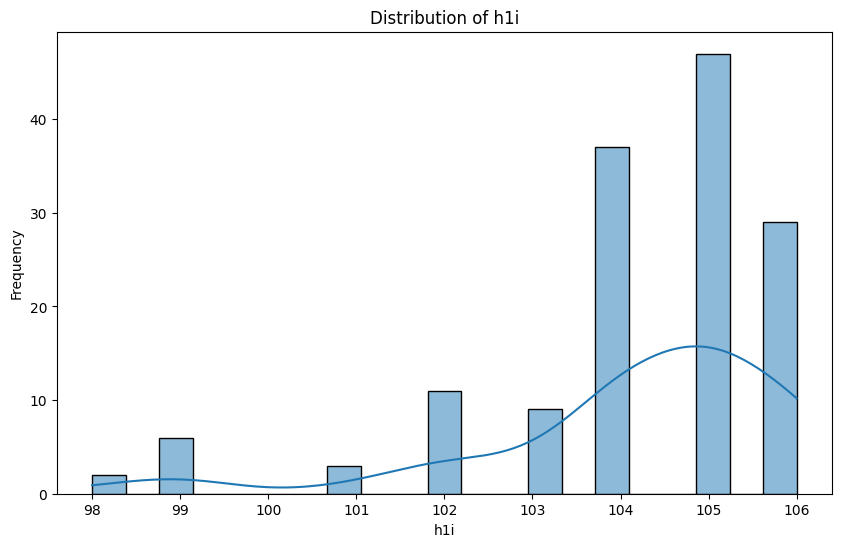


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       3.895833
std        0.810670
min        2.550000
25%        3.450000
50%        3.850000
75%        4.250000
max        5.650000
Name: t1a, dtype: float64


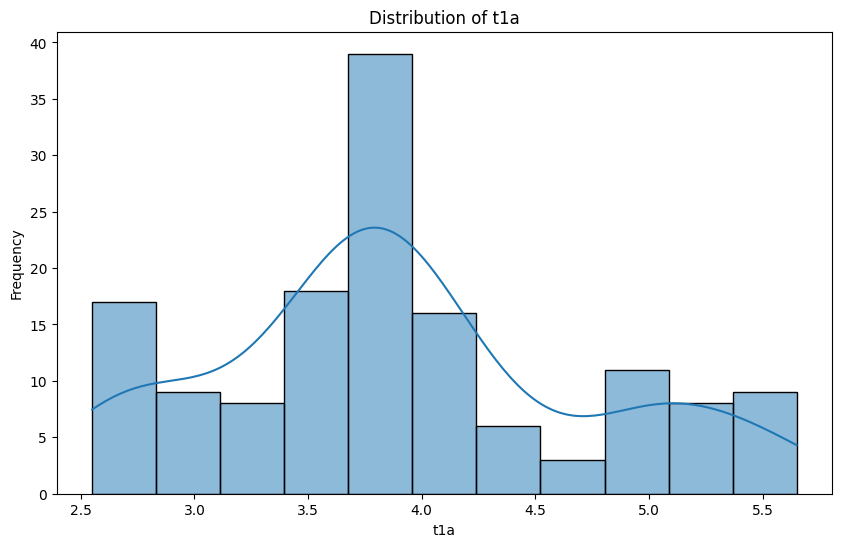


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       3.974306
std        0.840267
min        2.550000
25%        3.450000
50%        3.850000
75%        4.375000
max        5.950000
Name: t1x, dtype: float64


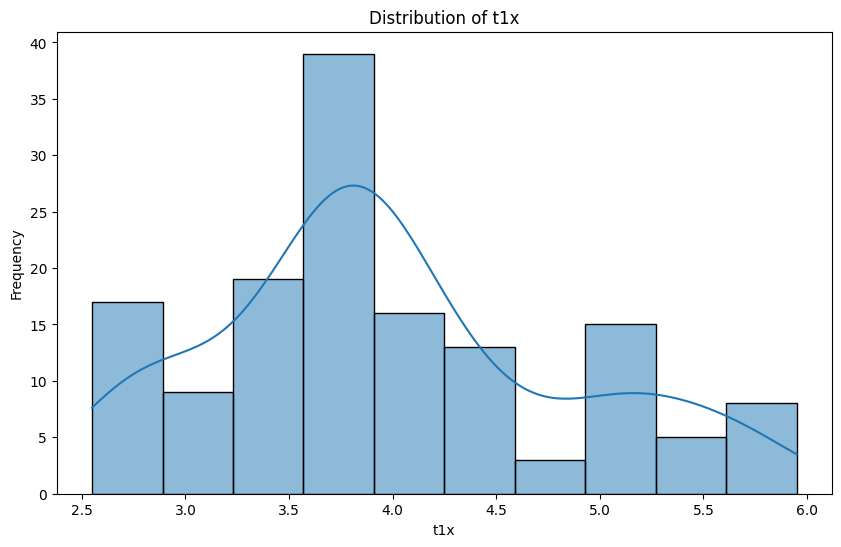


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       3.822917
std        0.790434
min        2.450000
25%        3.425000
50%        3.750000
75%        4.150000
max        5.550000
Name: t1i, dtype: float64


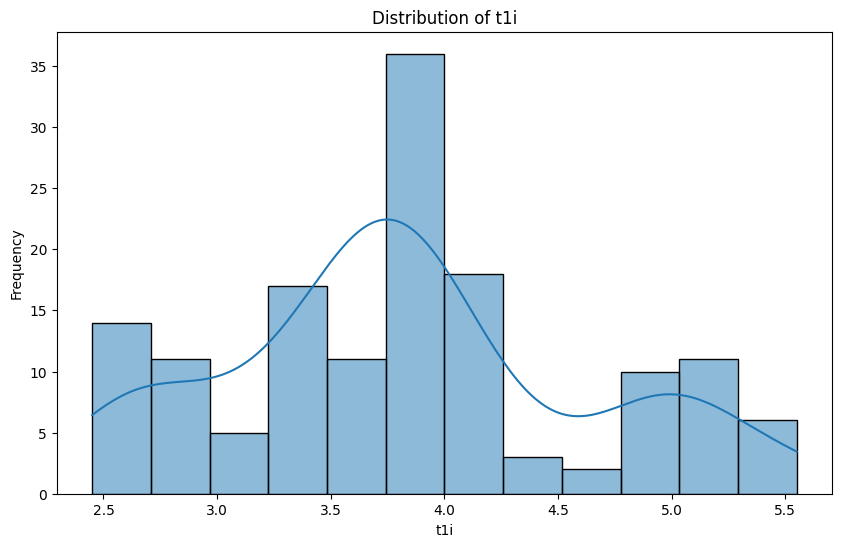


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1005.034722
std         0.641384
min      1004.000000
25%      1005.000000
50%      1005.000000
75%      1005.000000
max      1006.000000
Name: b1a, dtype: float64


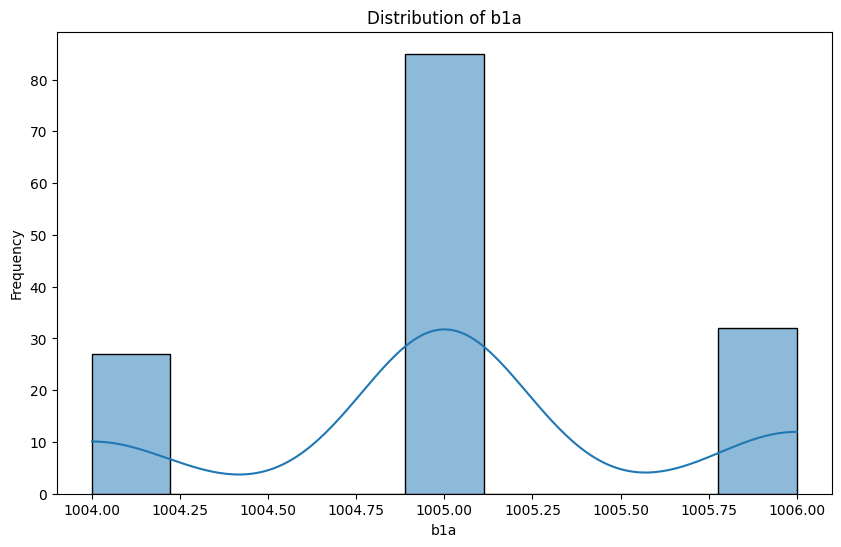


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1005.444444
std         0.588678
min      1004.000000
25%      1005.000000
50%      1005.000000
75%      1006.000000
max      1007.000000
Name: b1x, dtype: float64


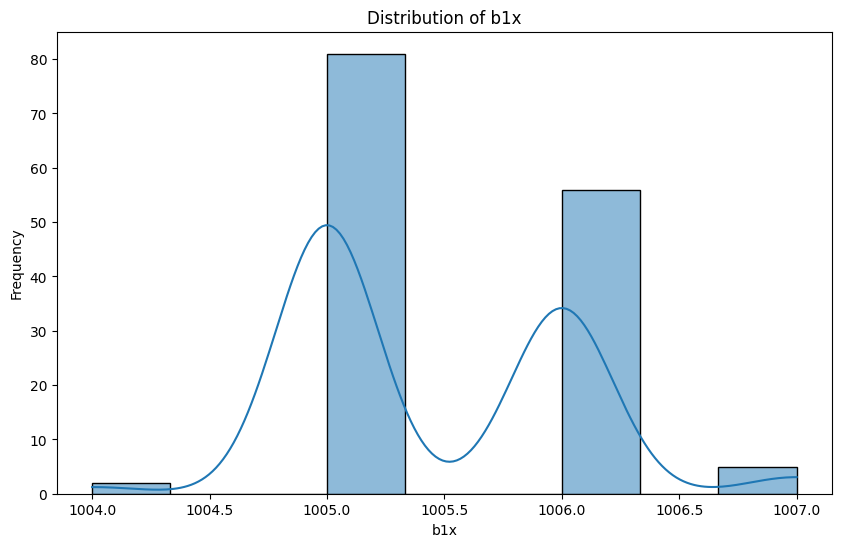


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1004.590278
std         0.619194
min      1004.000000
25%      1004.000000
50%      1005.000000
75%      1005.000000
max      1006.000000
Name: b1i, dtype: float64


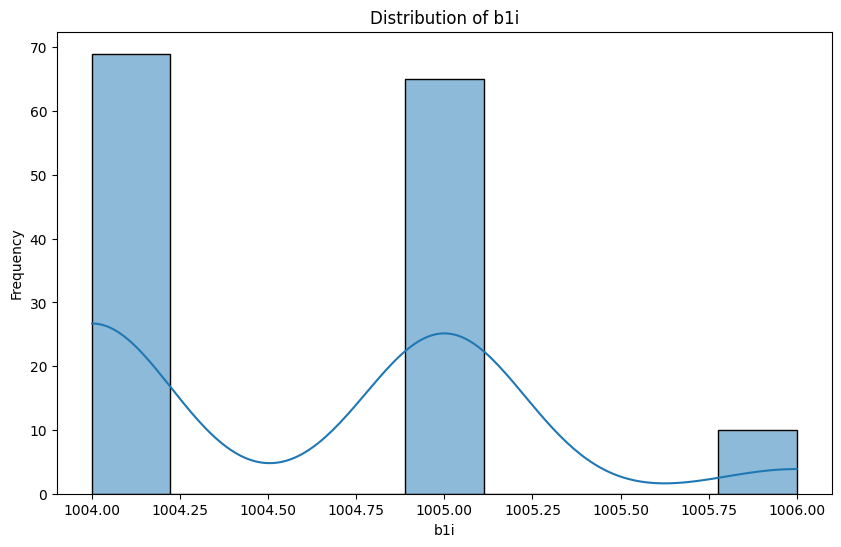


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       6.850239
std        3.656443
min        0.672750
25%        2.967537
50%        7.974360
75%       10.021565
max       12.474540
Name: p1a, dtype: float64


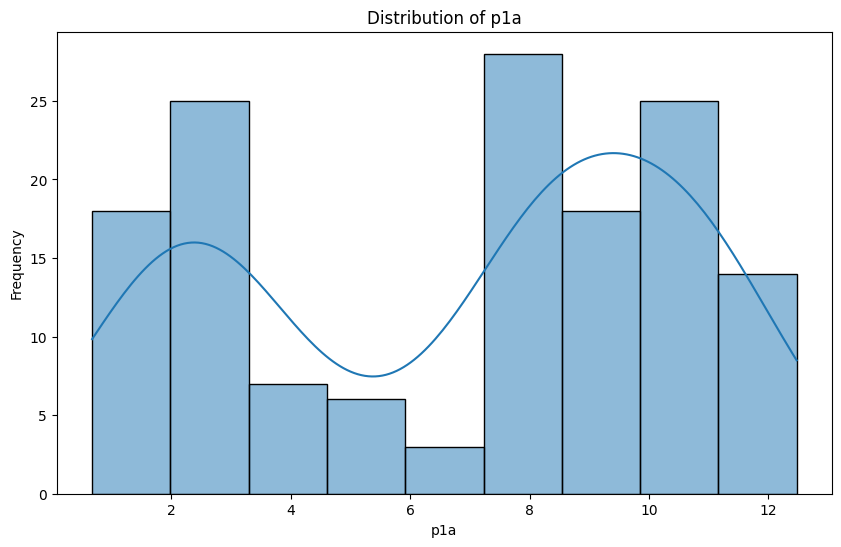


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean       8.473995
std        4.515321
min        0.961600
25%        3.552125
50%        9.489700
75%       12.481413
max       15.679450
Name: p1x, dtype: float64


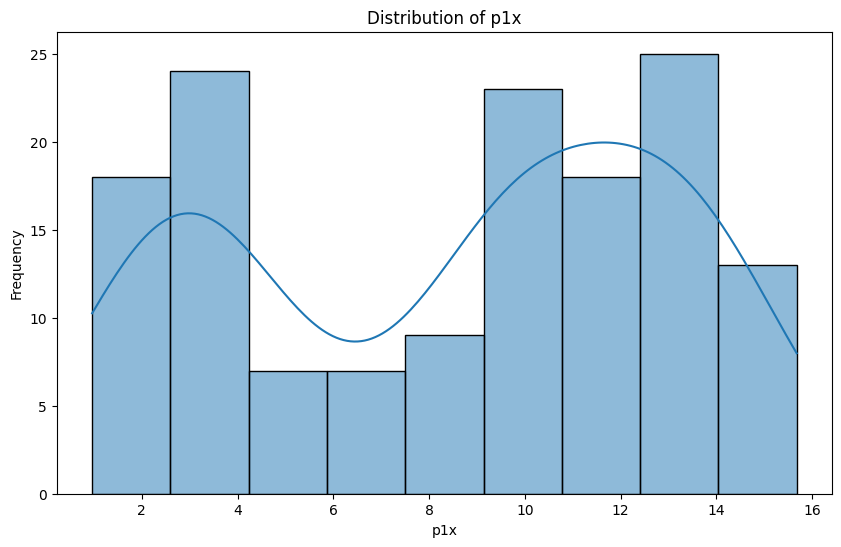


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       4.707927
std        2.483044
min        0.411400
25%        2.096388
50%        5.592450
75%        6.692850
max        9.031200
Name: p1i, dtype: float64


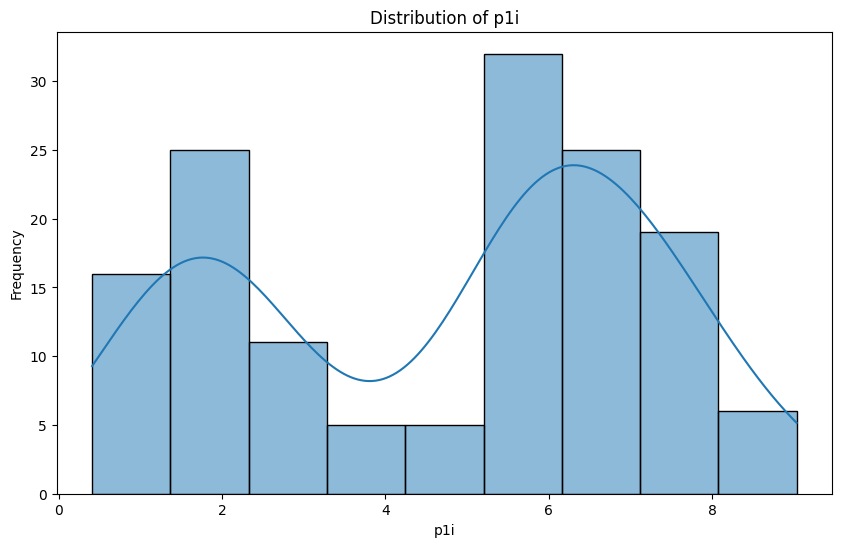


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.732138
std        0.424710
min        0.068780
25%        0.328975
50%        0.733605
75%        1.045380
max        1.976140
Name: p1s, dtype: float64


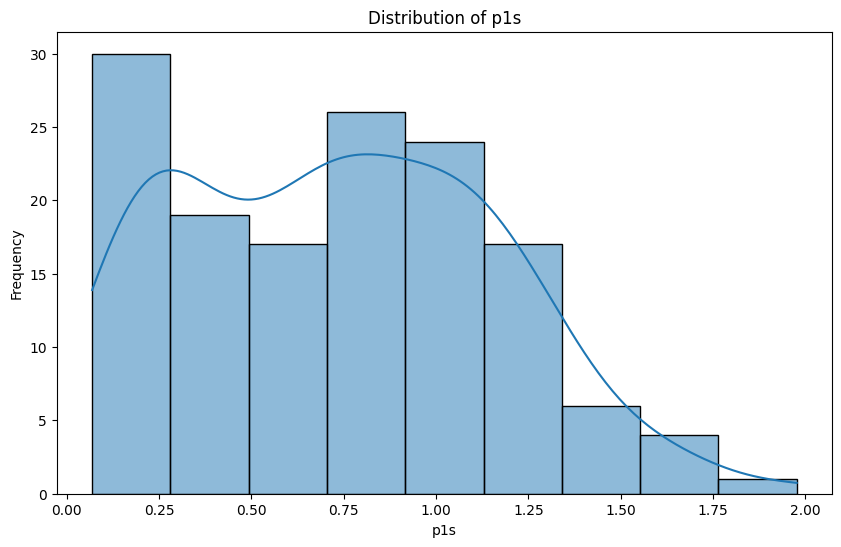


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      44.305556
std        0.639906
min       43.000000
25%       44.000000
50%       44.000000
75%       45.000000
max       45.000000
Name: tia, dtype: float64


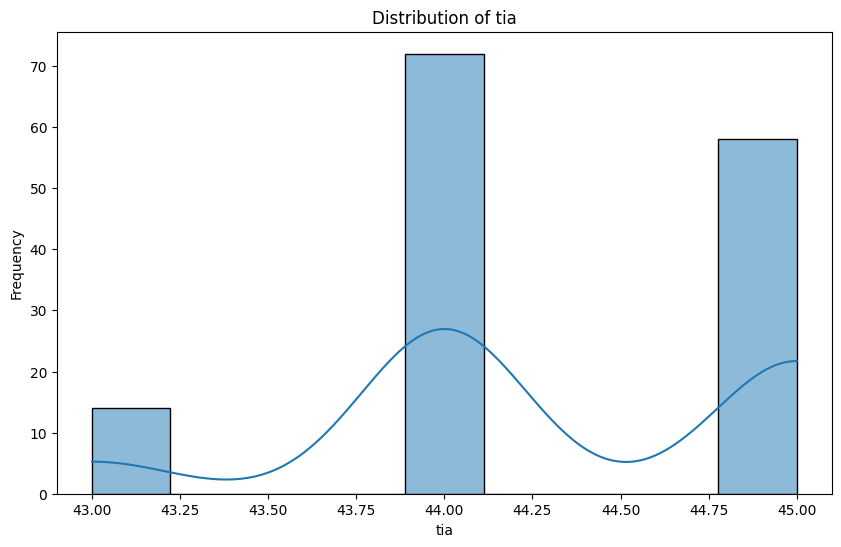


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      44.319444
std        0.643991
min       43.000000
25%       44.000000
50%       44.000000
75%       45.000000
max       45.000000
Name: tix, dtype: float64


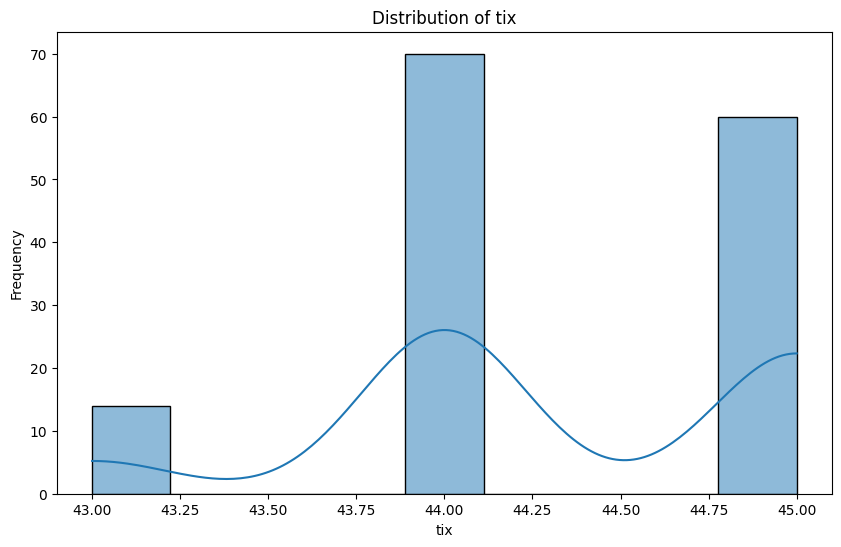


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      44.284722
std        0.654871
min       43.000000
25%       44.000000
50%       44.000000
75%       45.000000
max       45.000000
Name: tii, dtype: float64


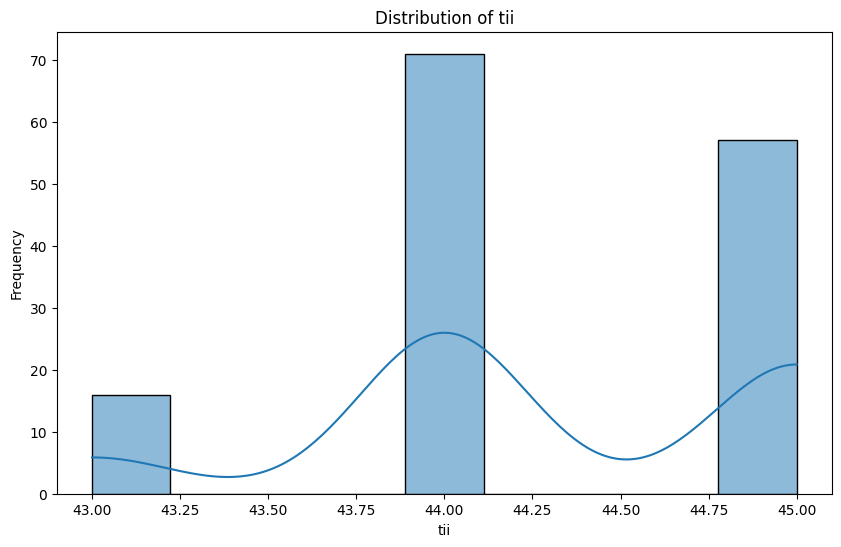


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     128.541667
std        4.570925
min      125.000000
25%      125.000000
50%      126.000000
75%      131.250000
max      139.000000
Name: vxa, dtype: float64


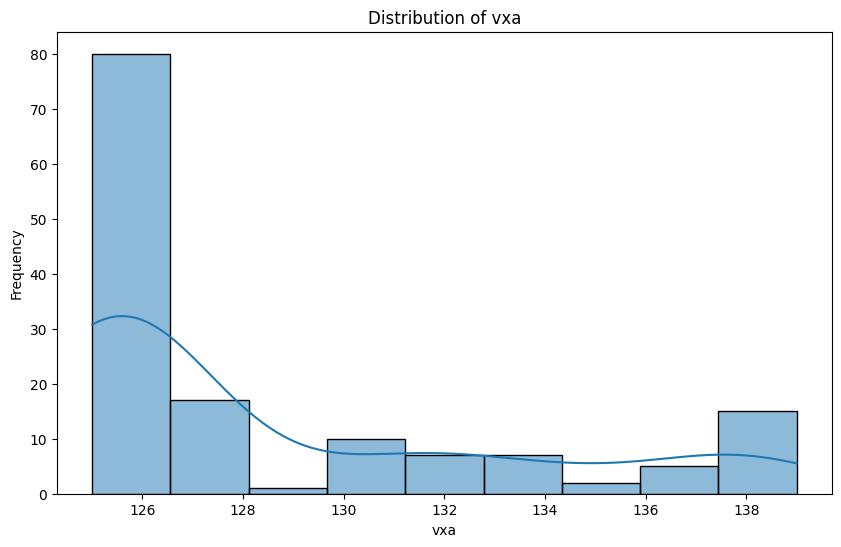


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     128.951389
std        5.009543
min      125.000000
25%      125.000000
50%      126.000000
75%      132.000000
max      141.000000
Name: vxx, dtype: float64


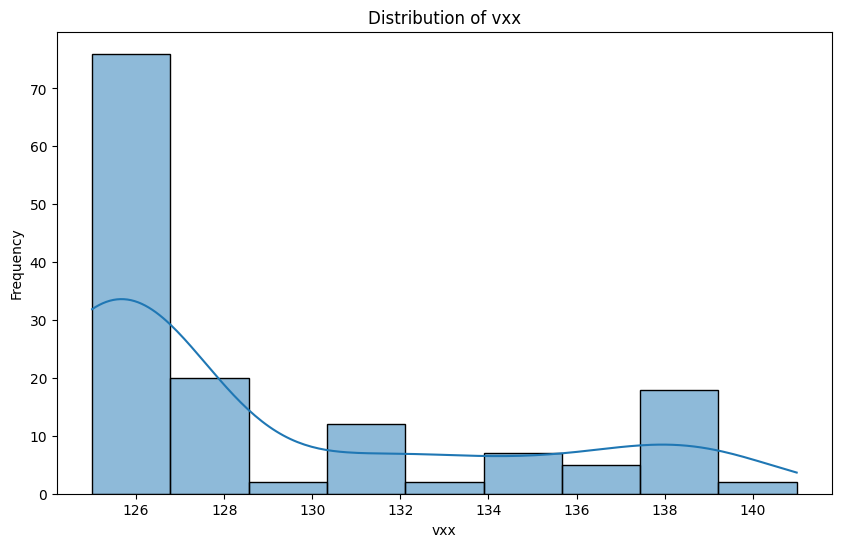


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     128.215278
std        4.261001
min      125.000000
25%      125.000000
50%      126.000000
75%      131.000000
max      138.000000
Name: vxi, dtype: float64


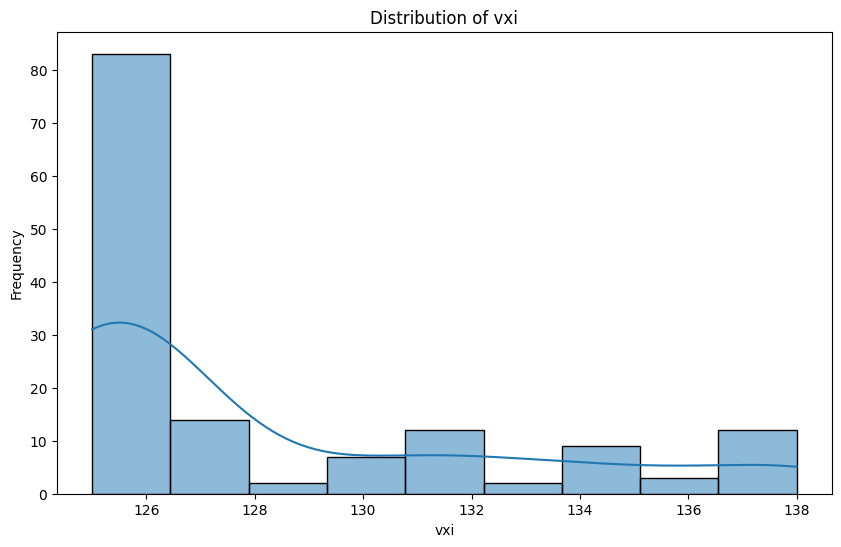


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


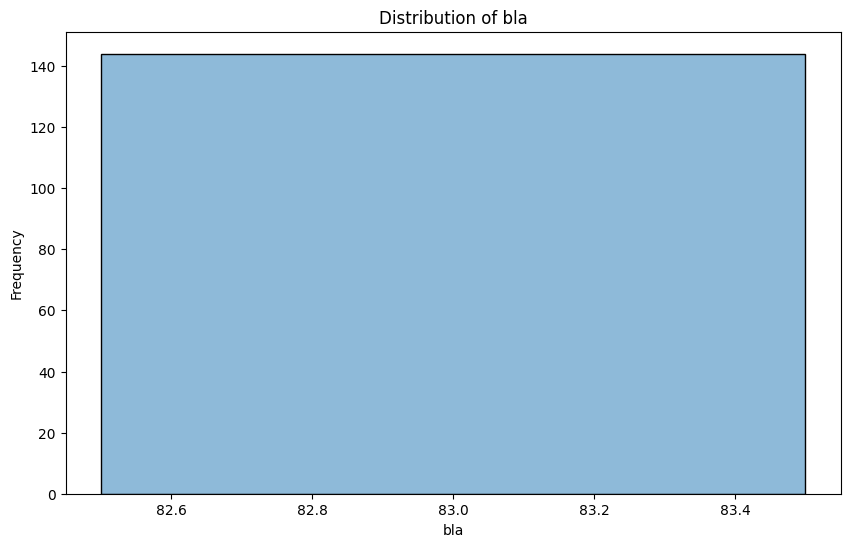


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


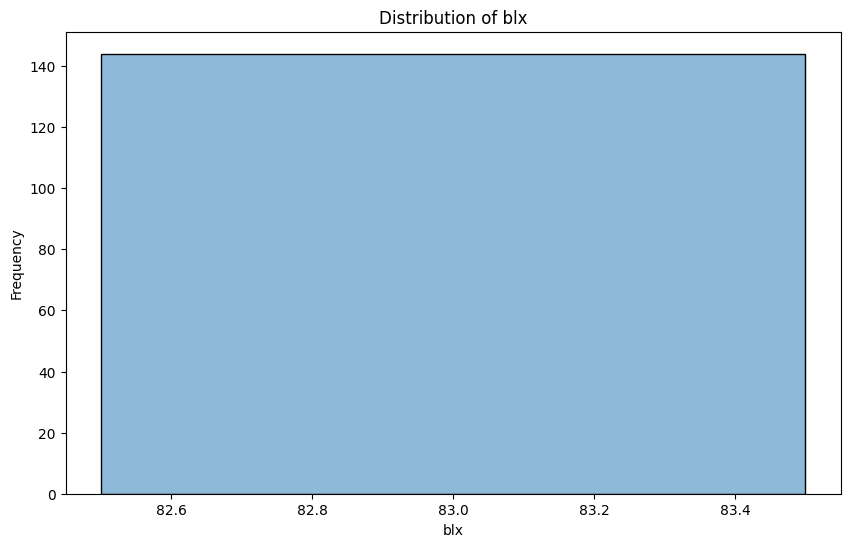


Analysis for column: bli
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bli, dtype: float64


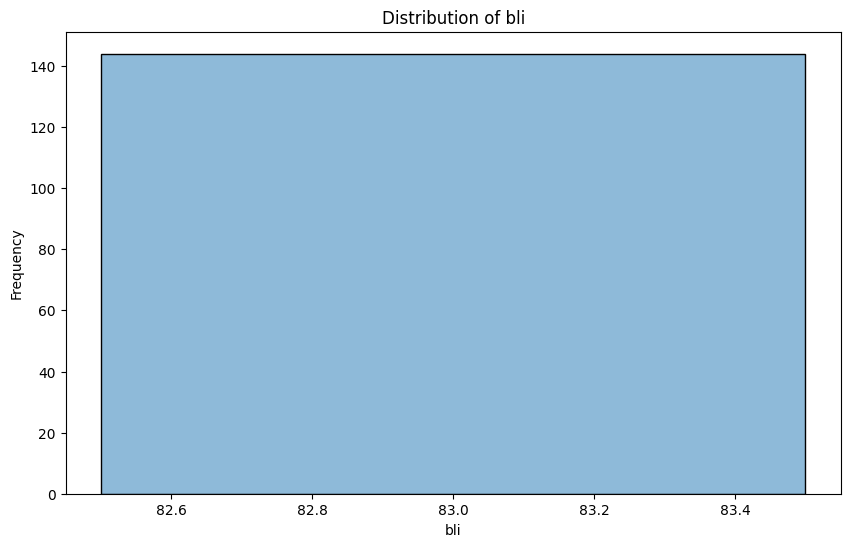


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


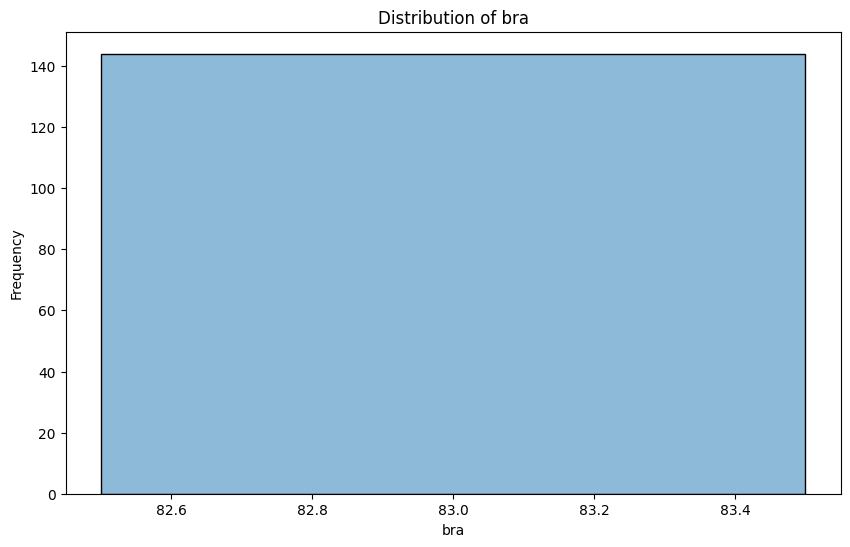


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


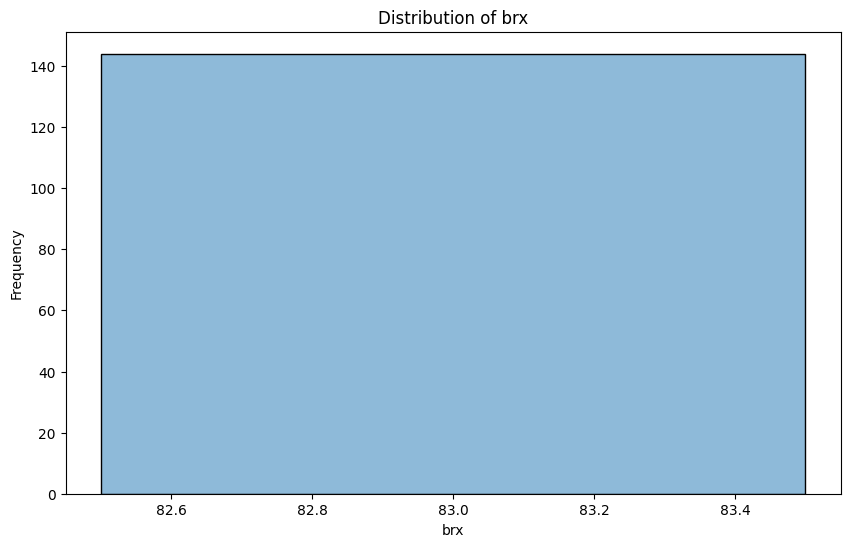


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


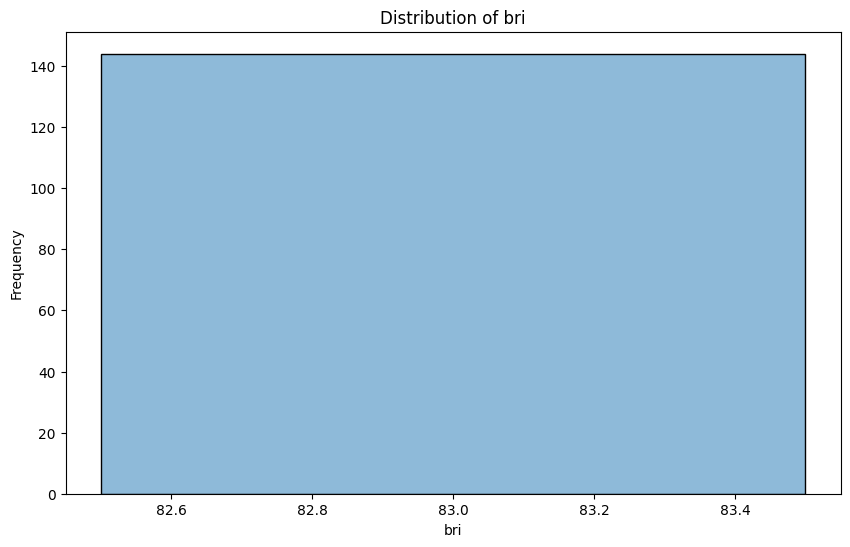

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

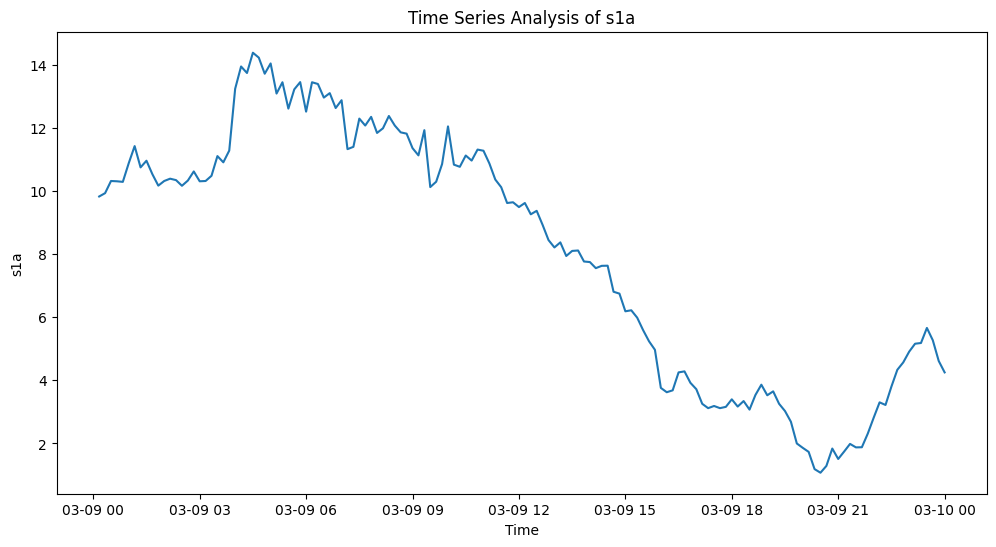

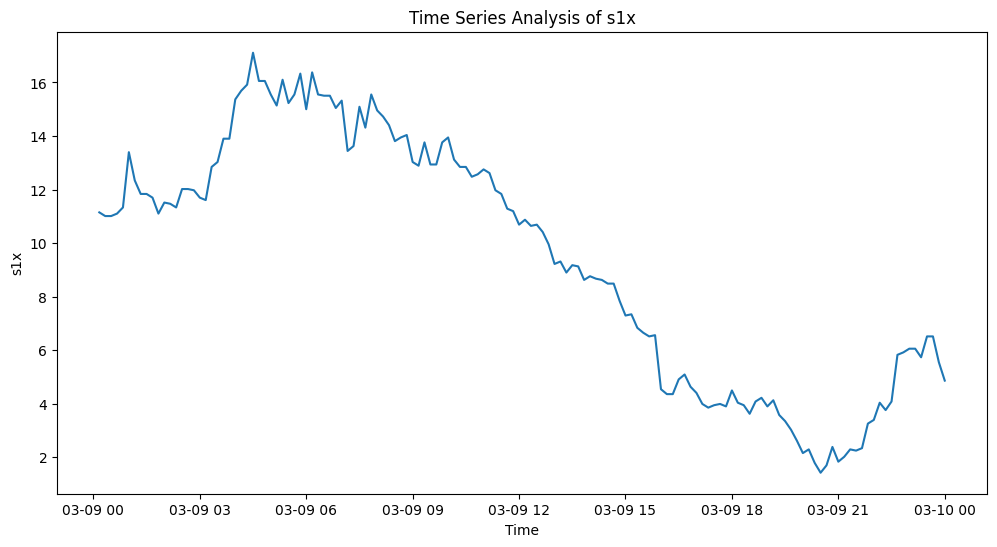

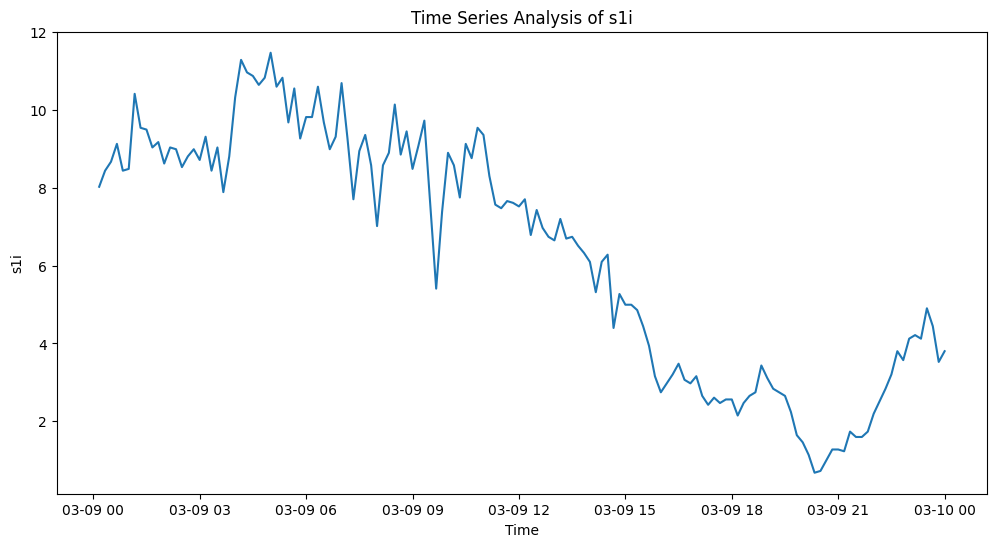

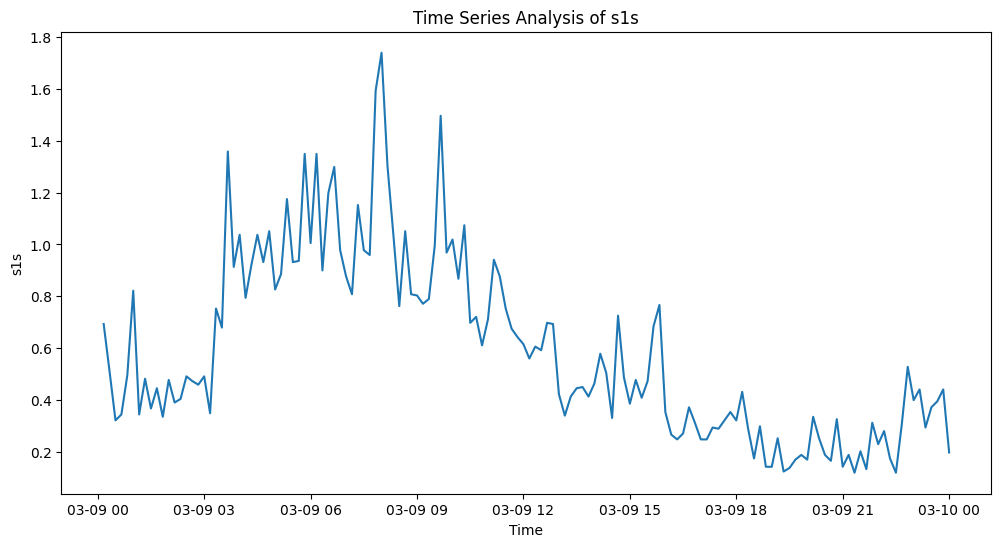

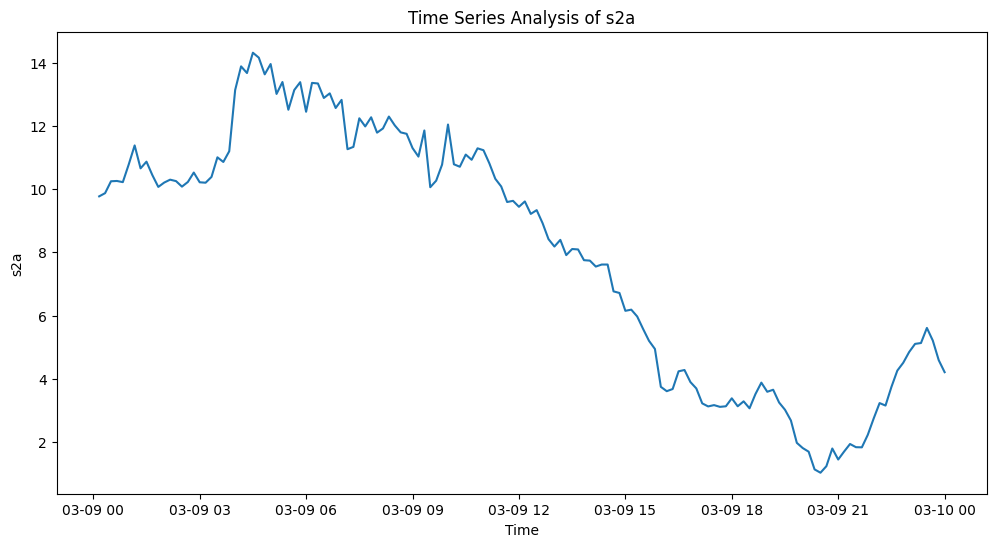

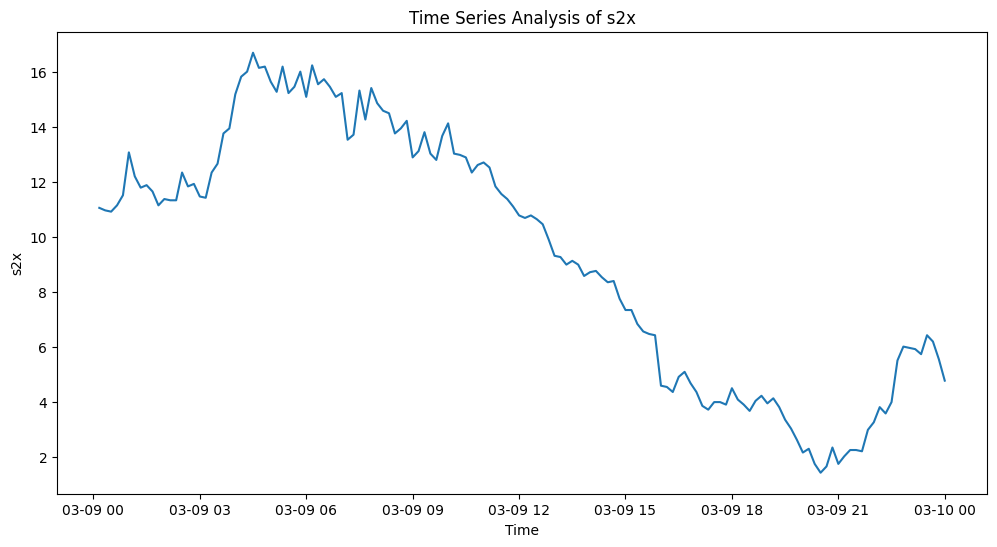

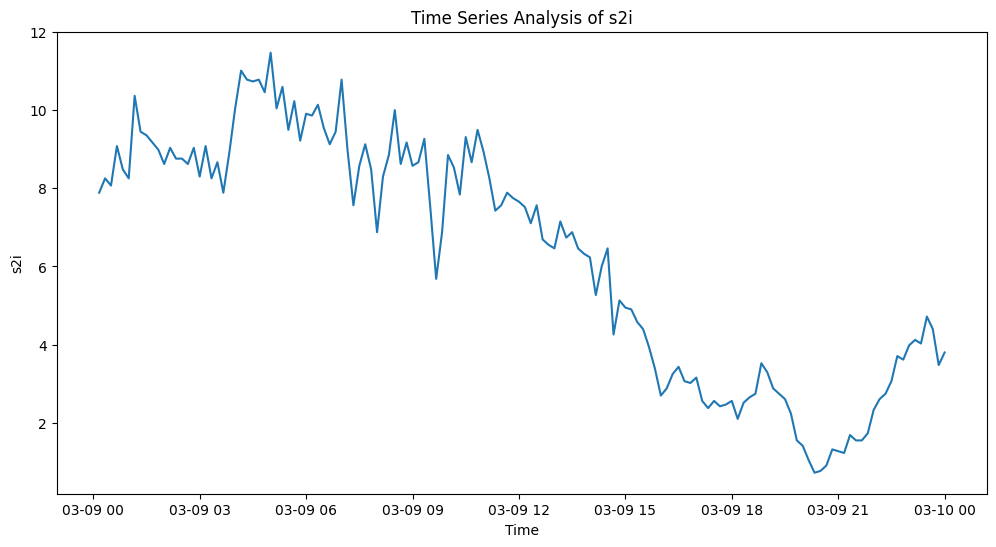

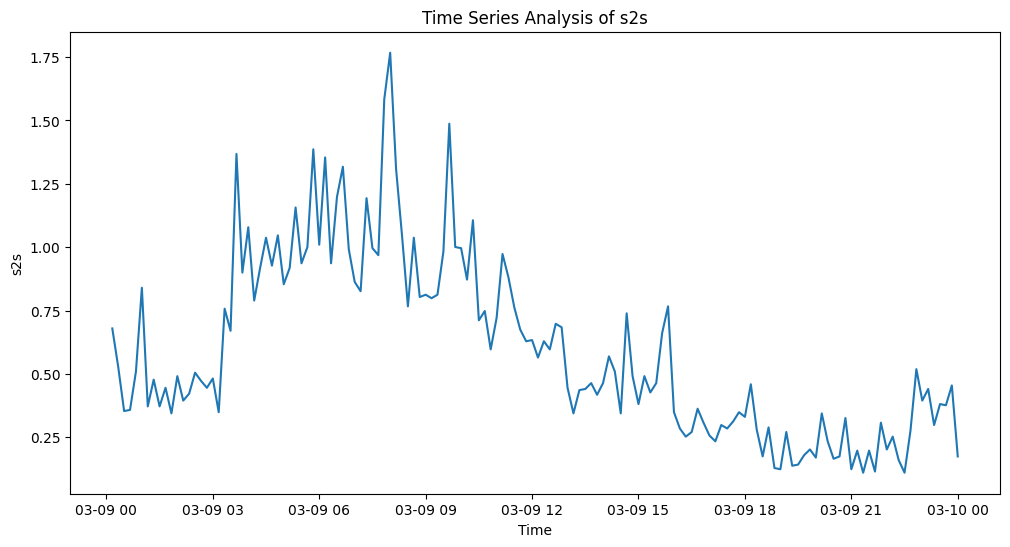

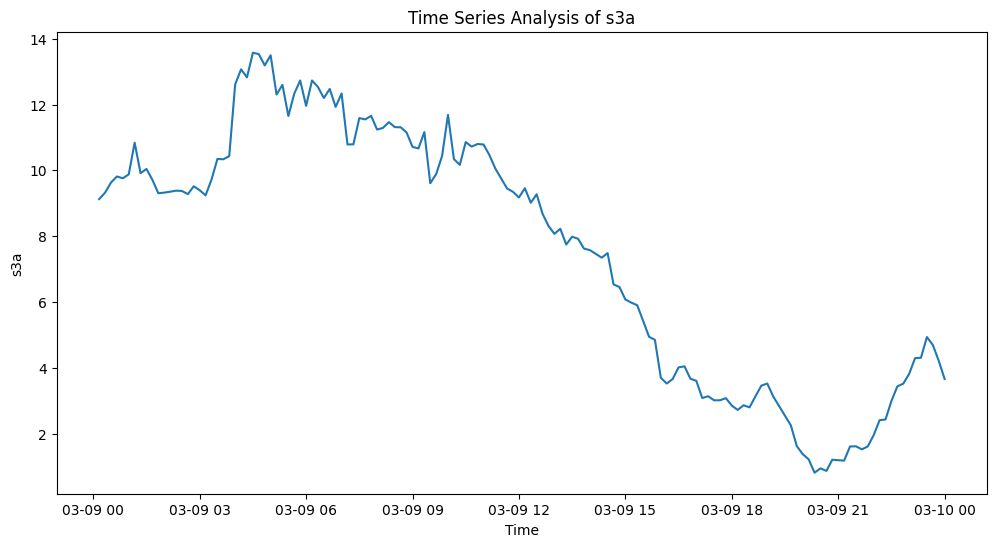

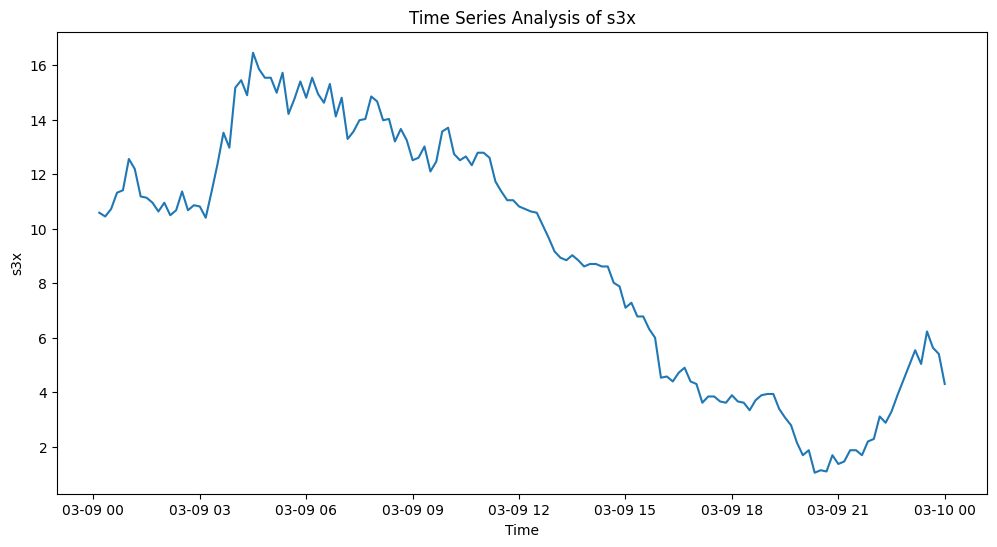

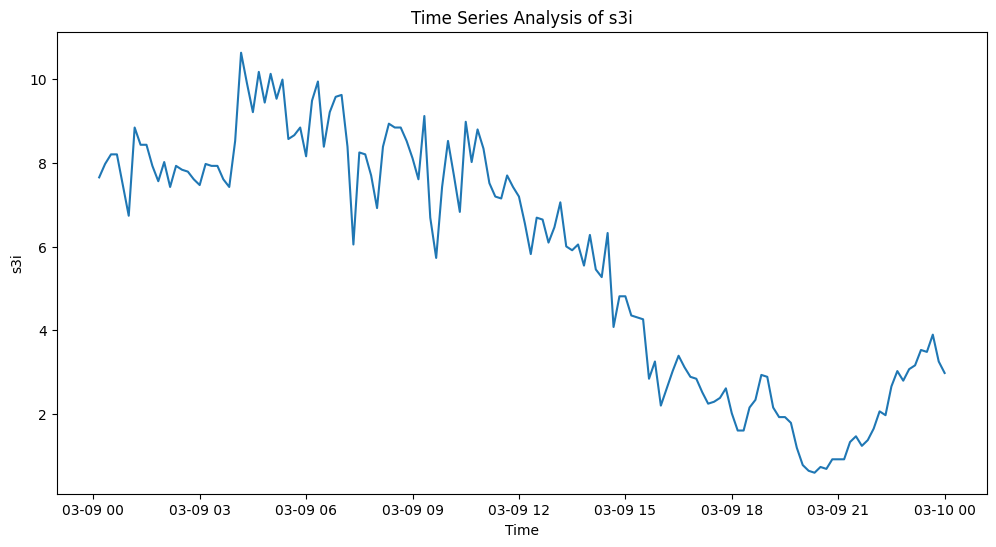

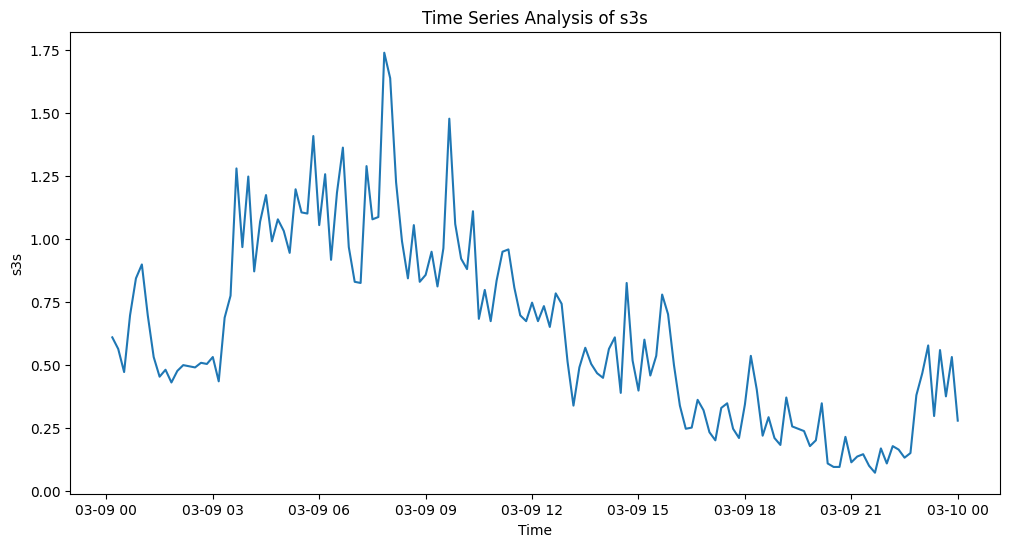

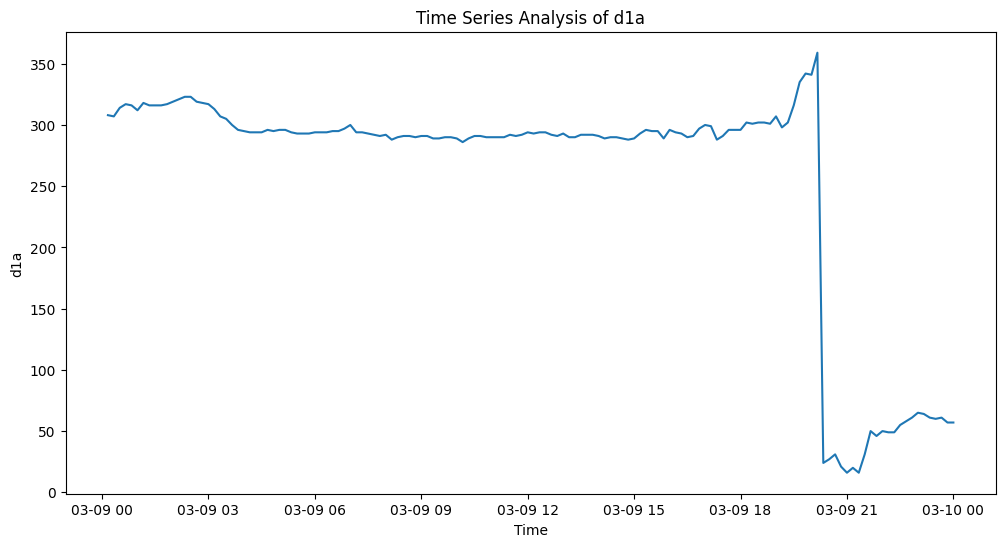

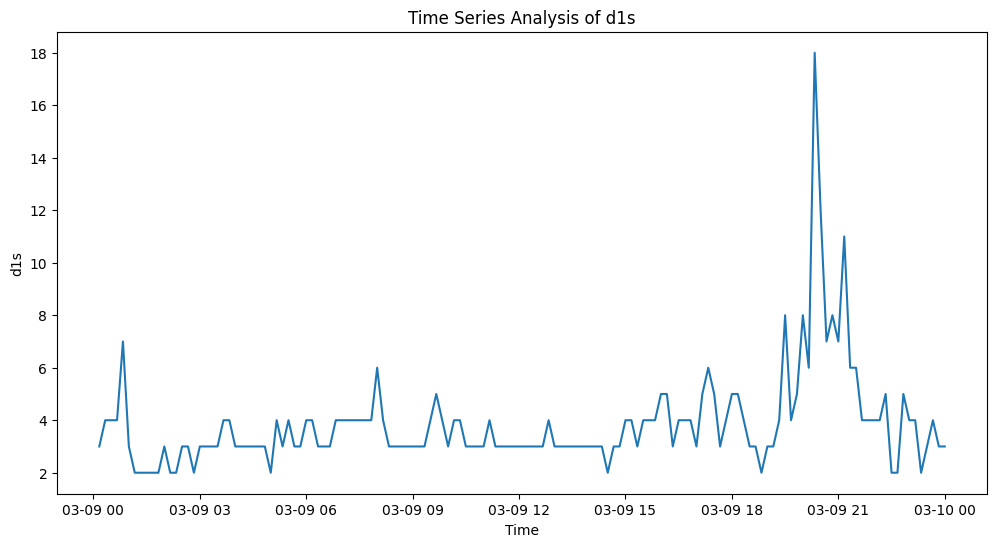

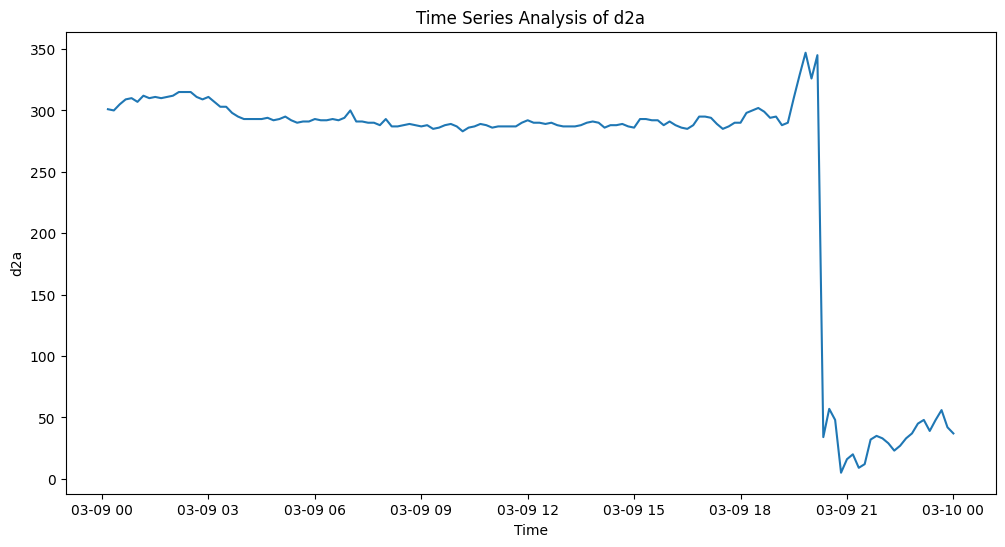

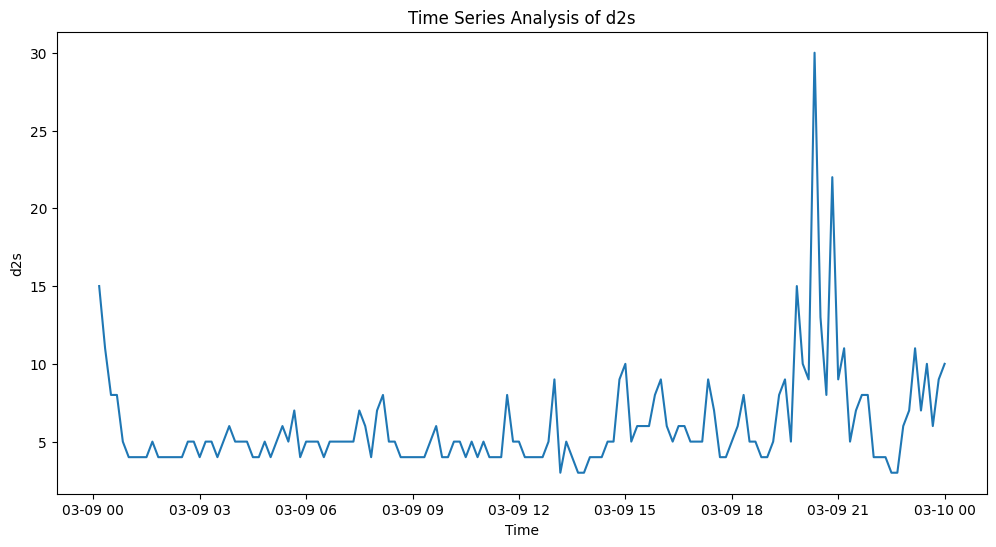

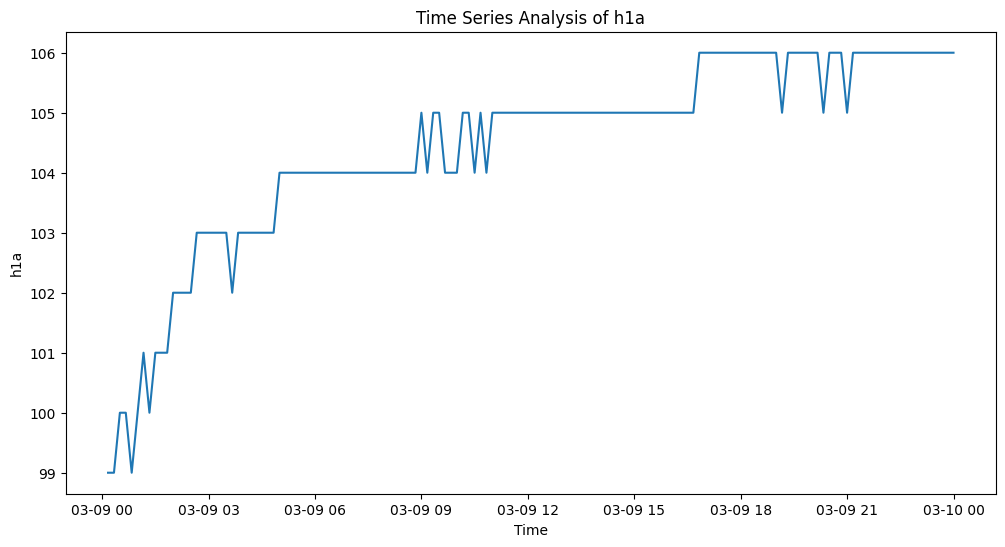

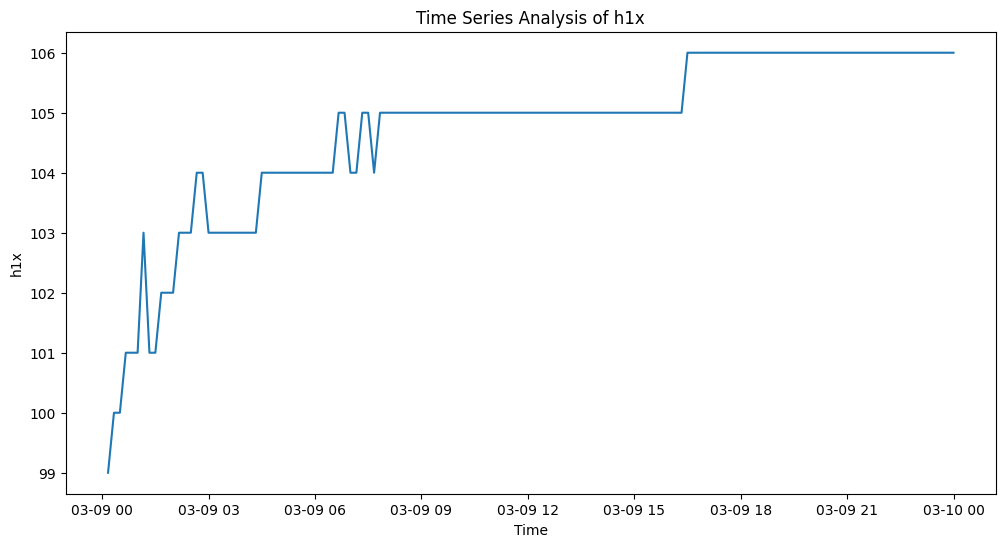

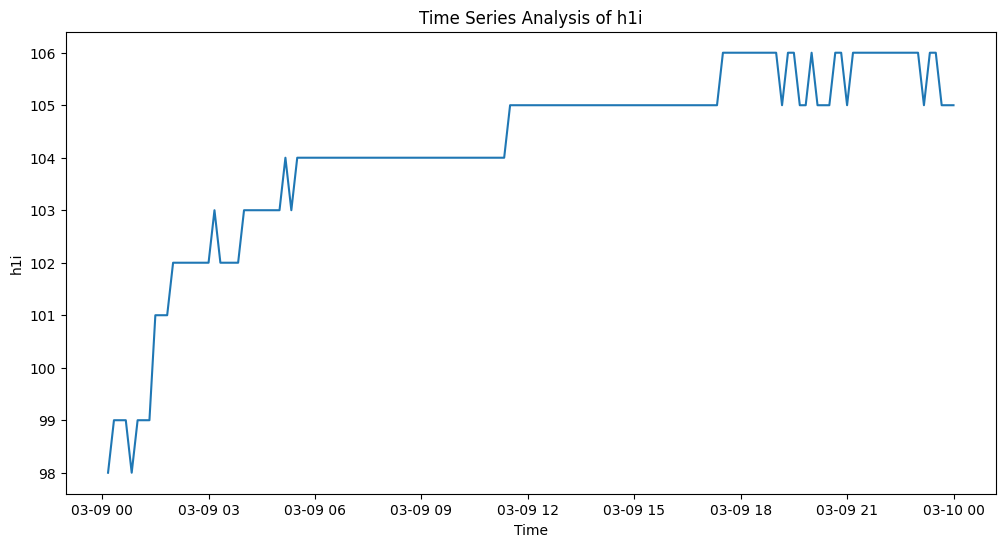

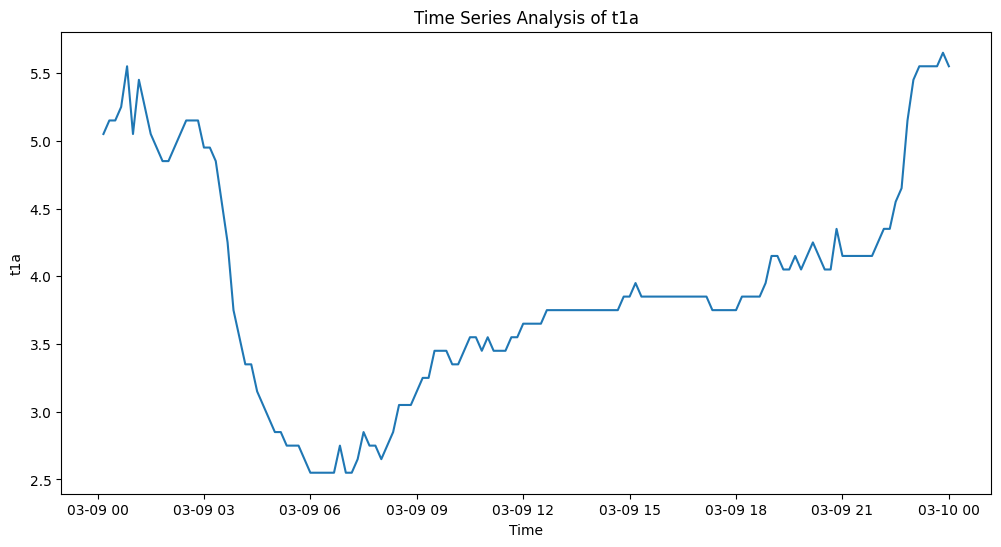

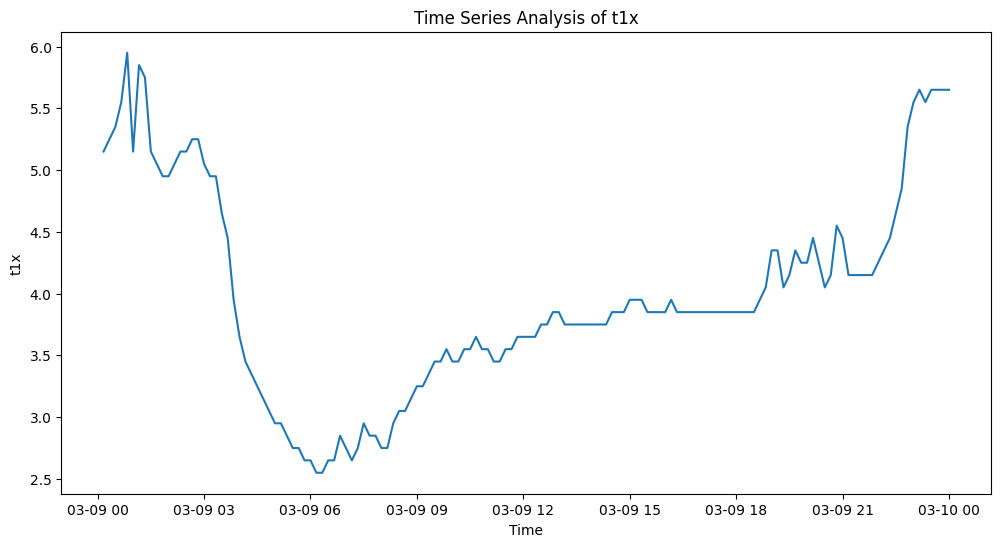

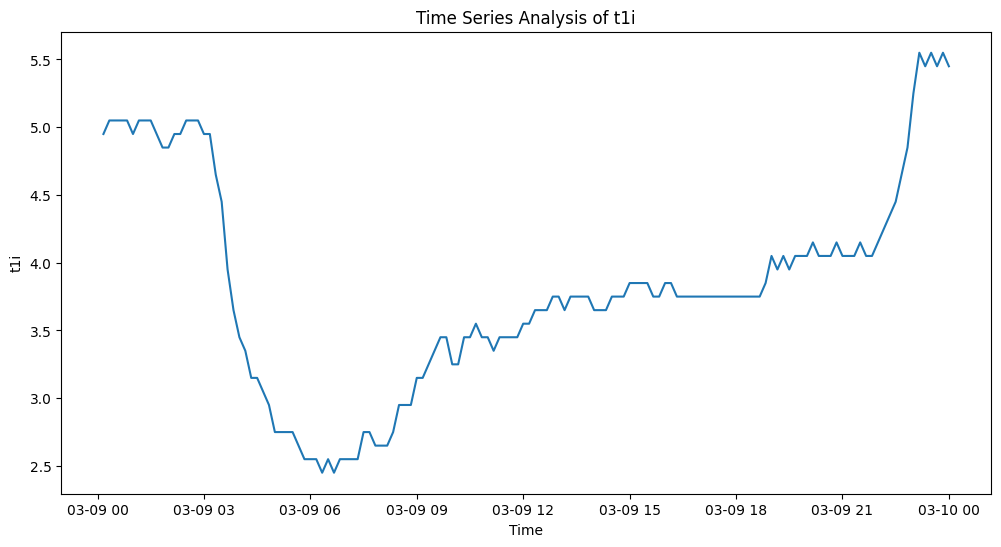

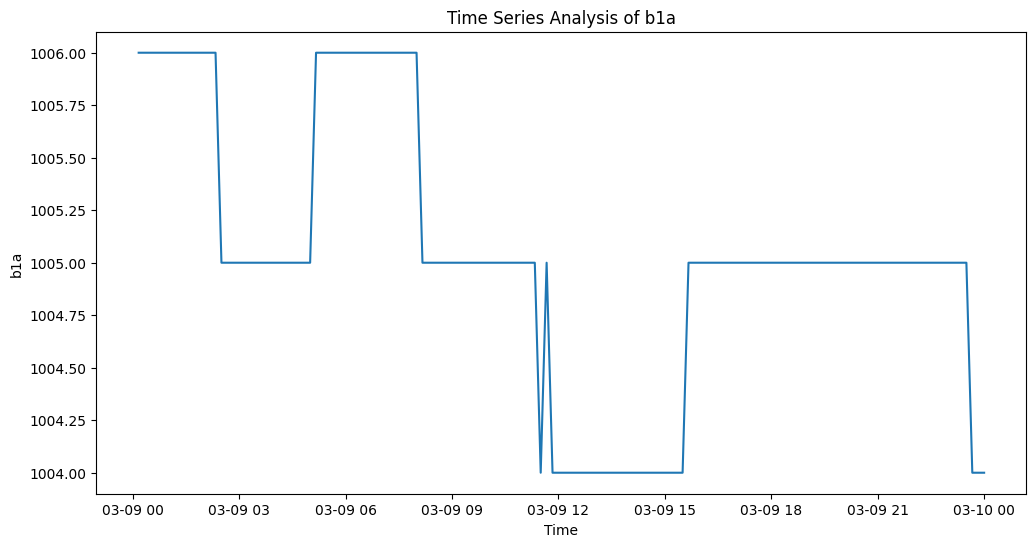

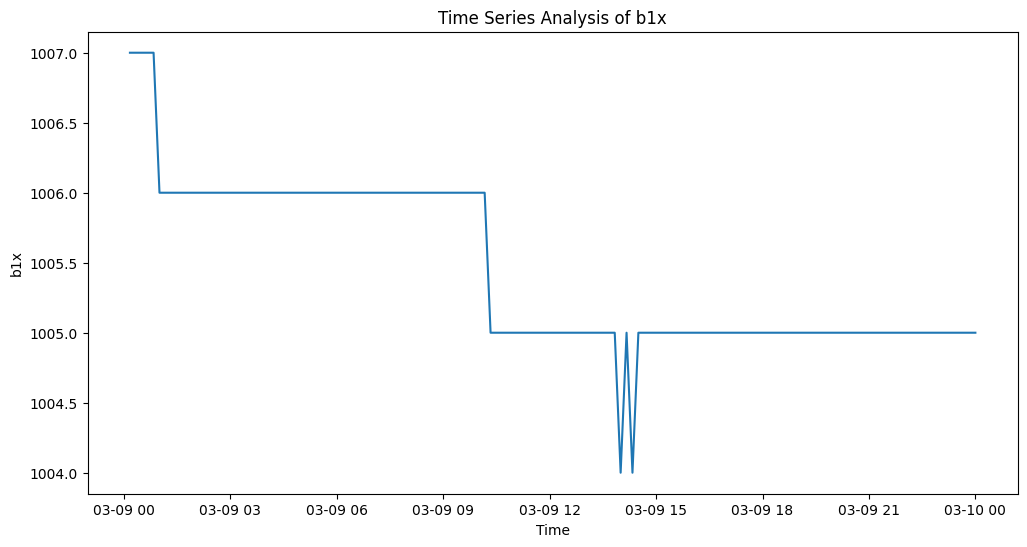

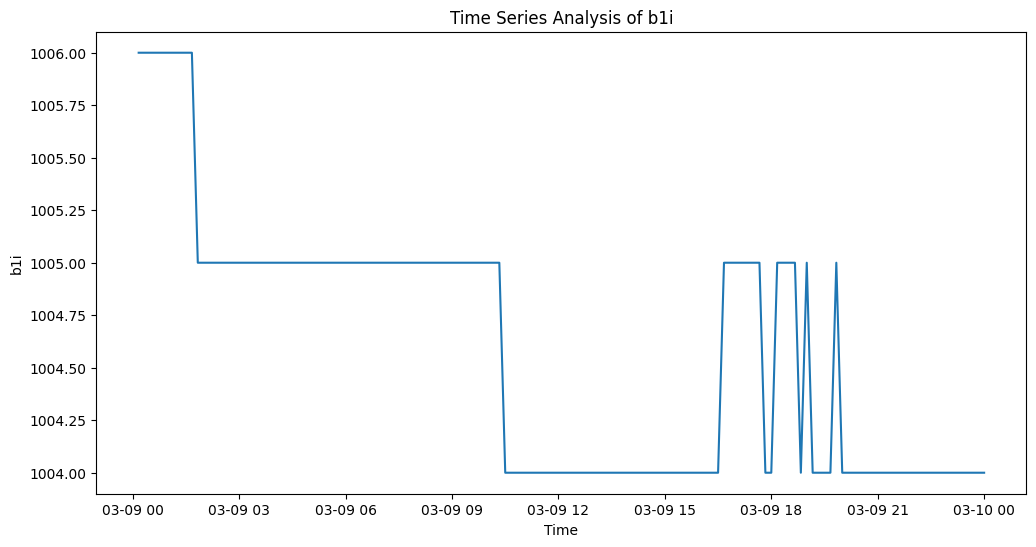

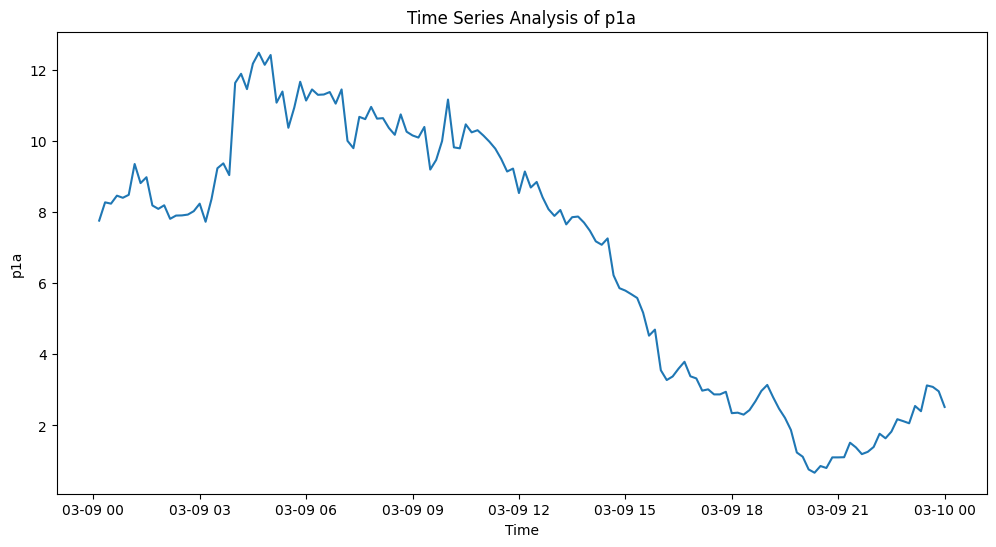

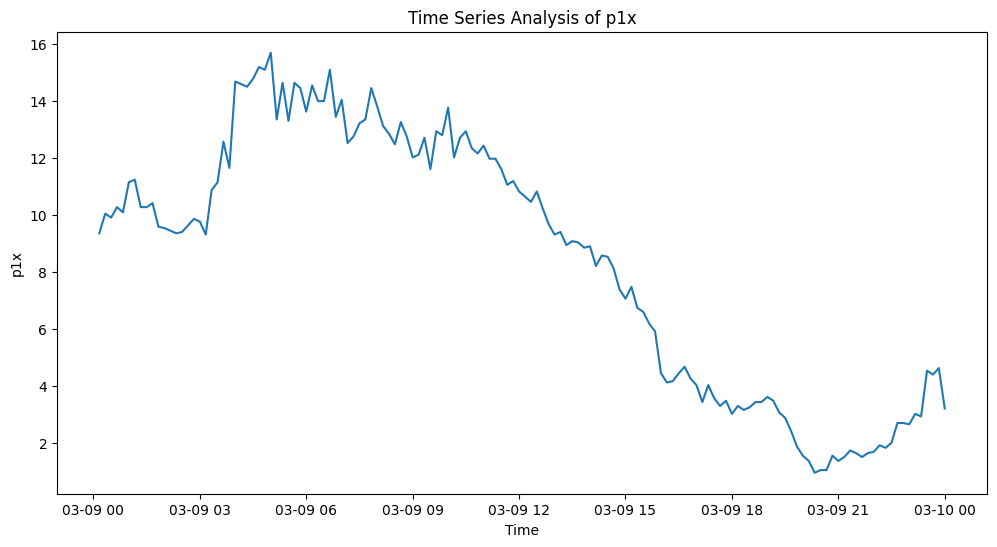

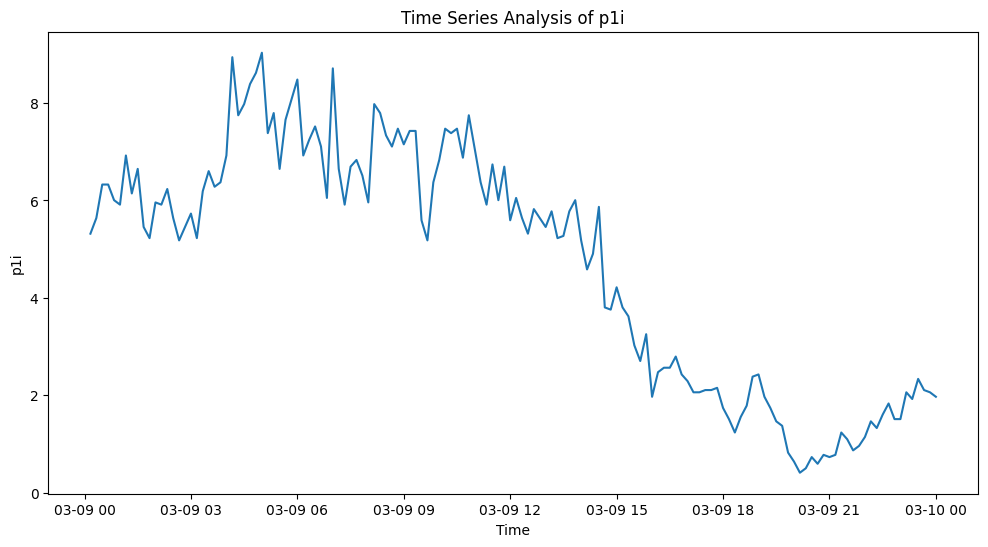

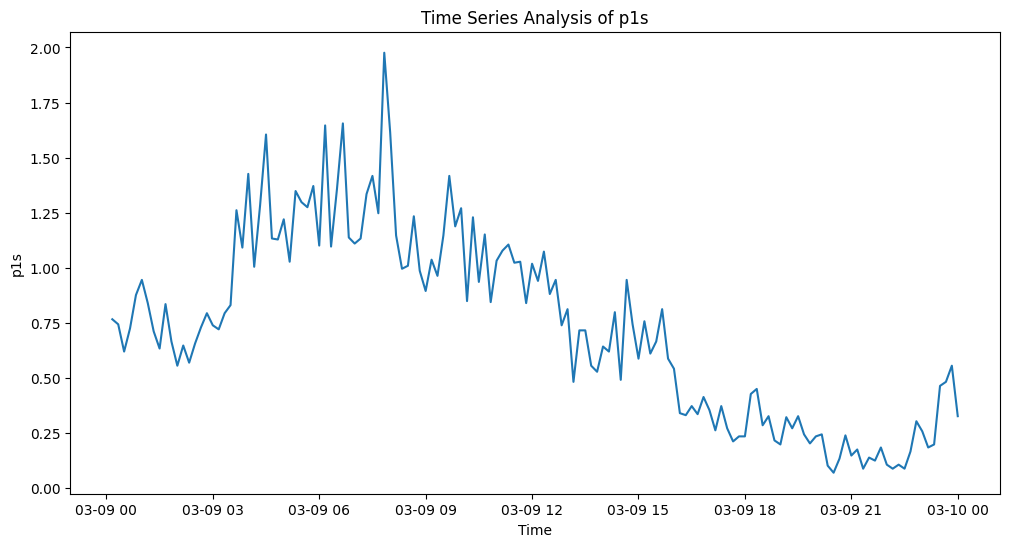

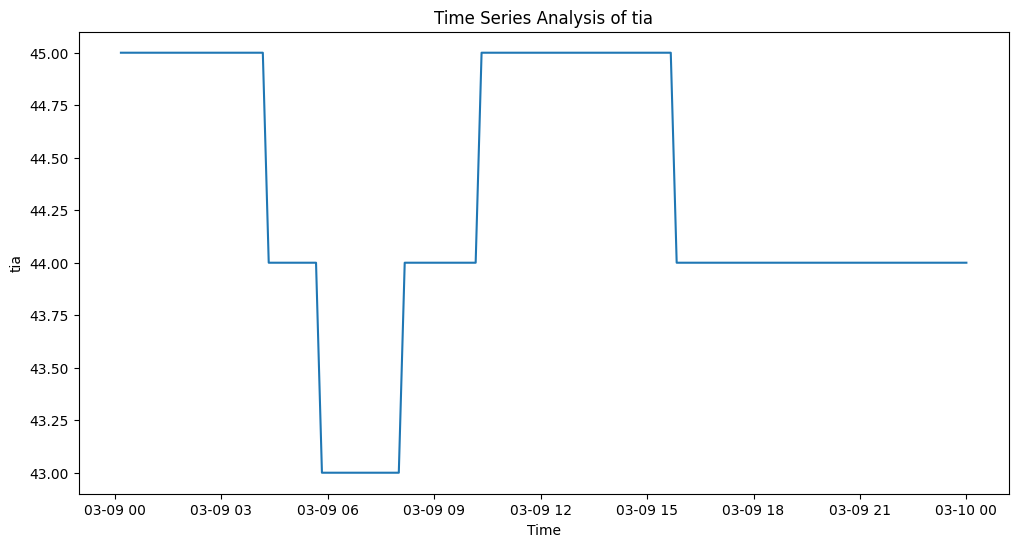

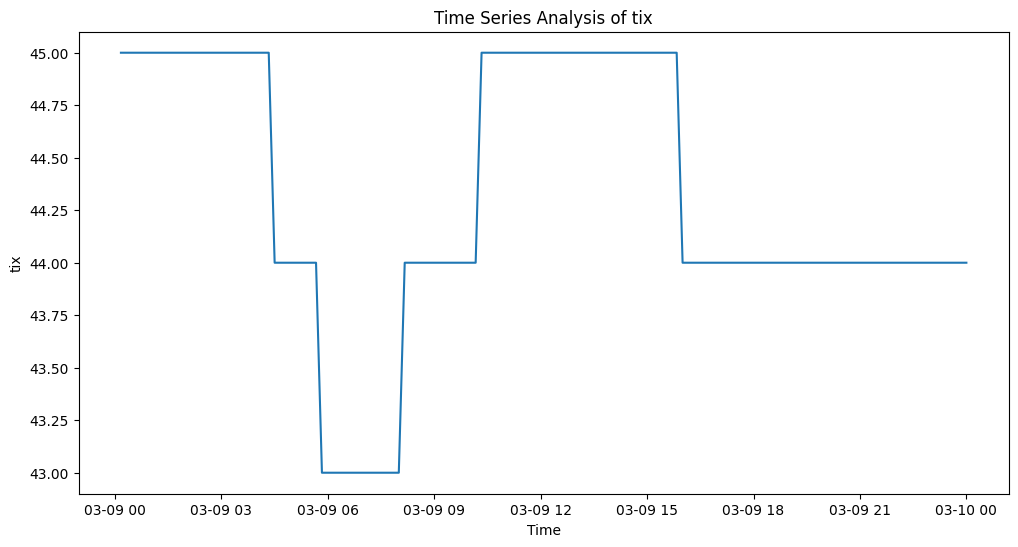

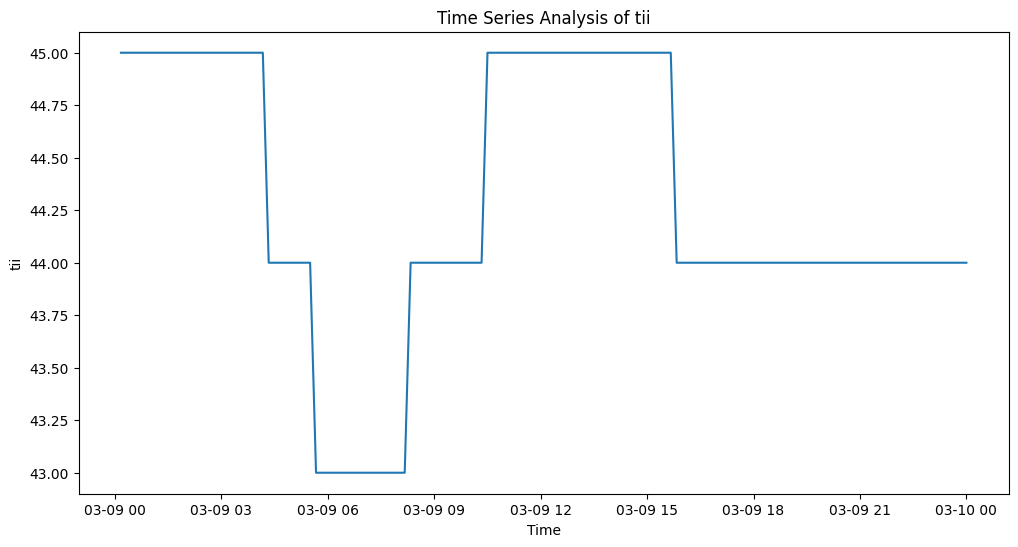

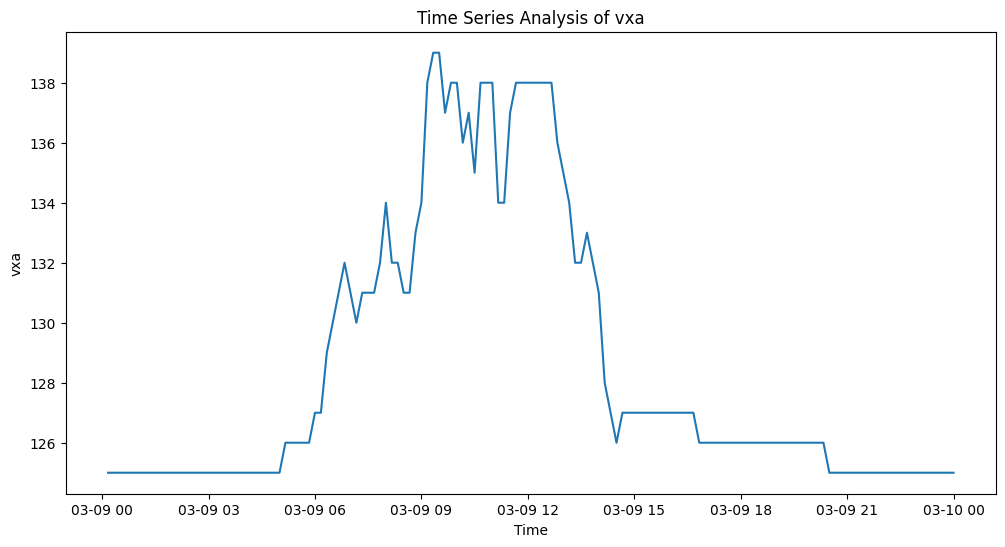

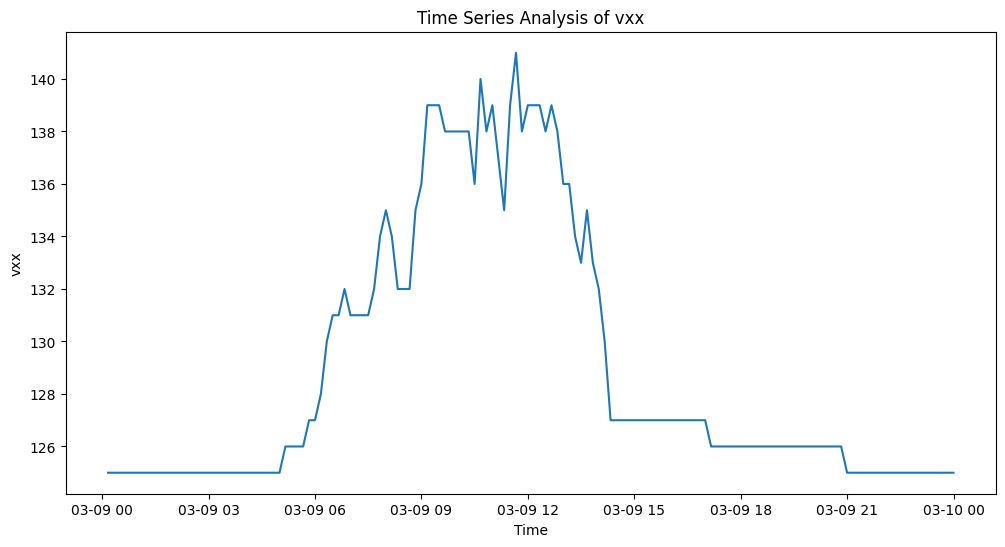

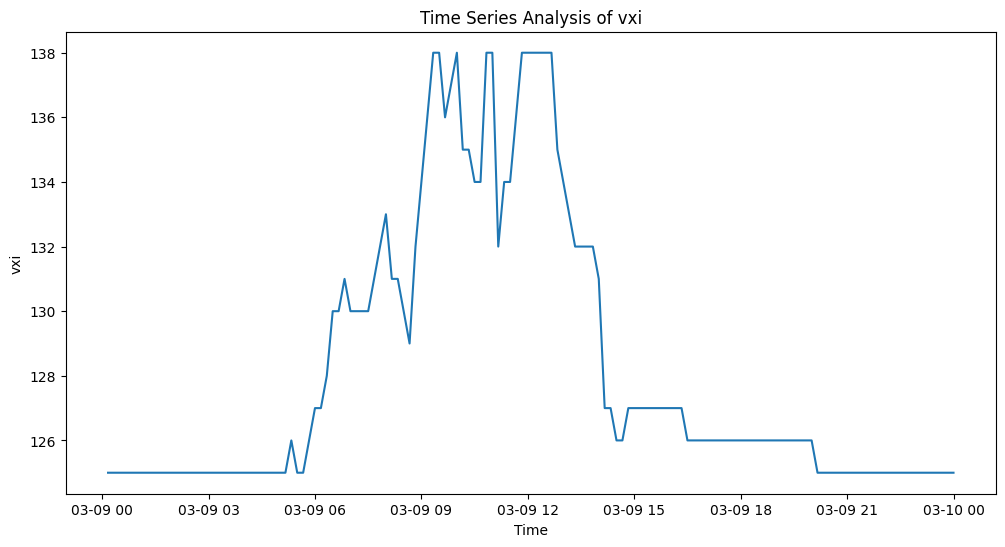

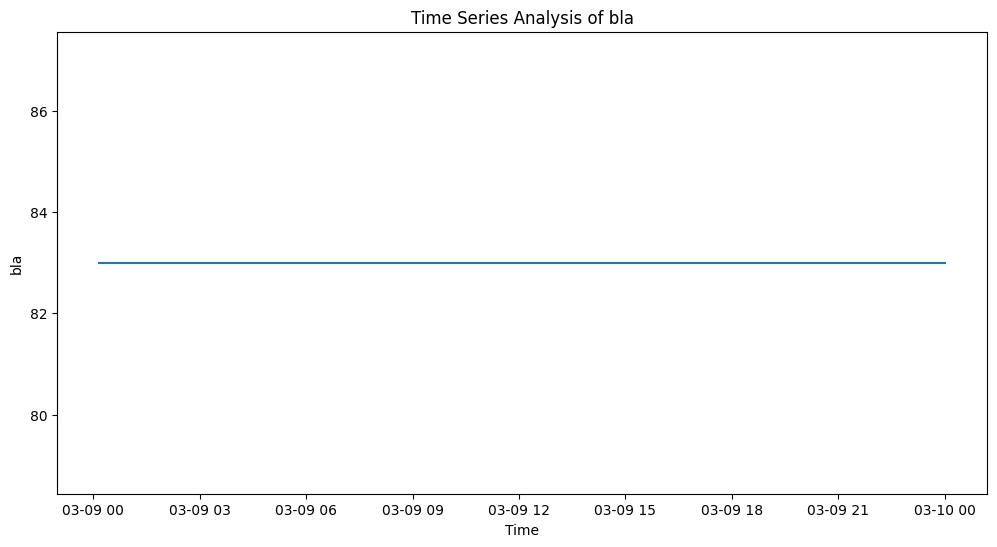

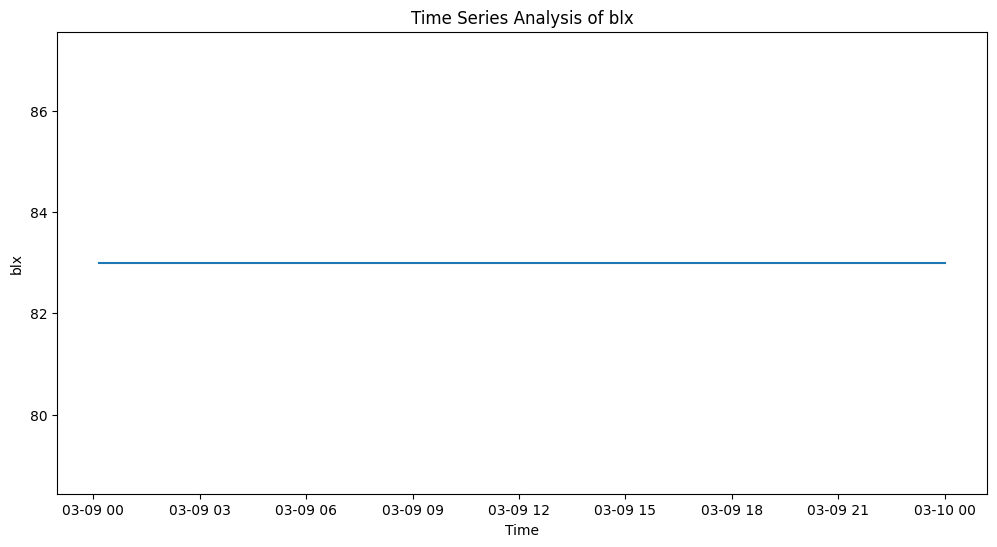

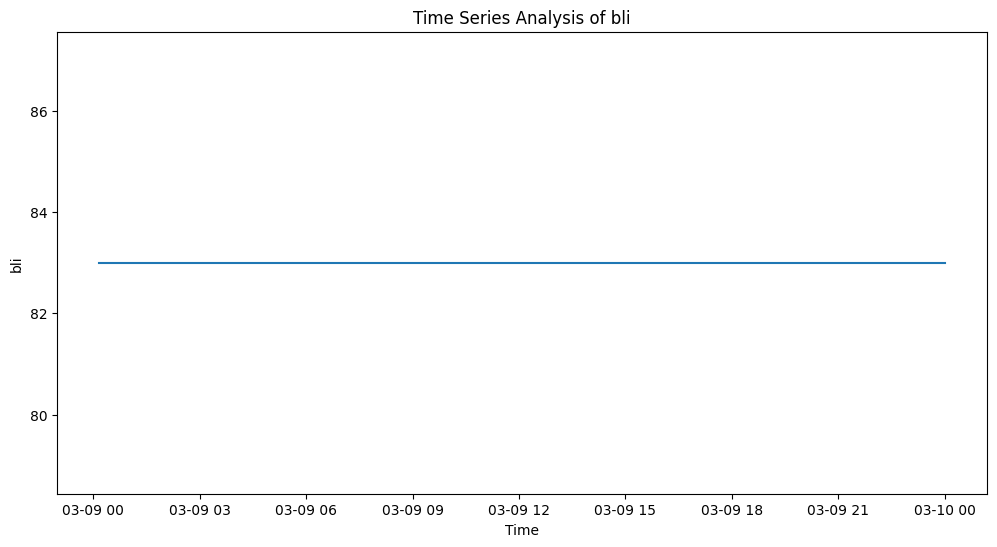

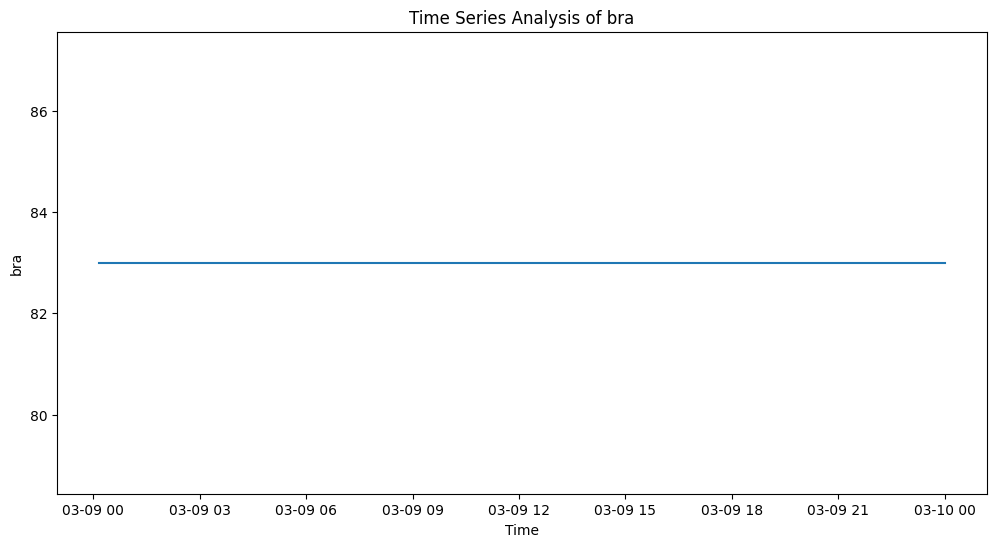

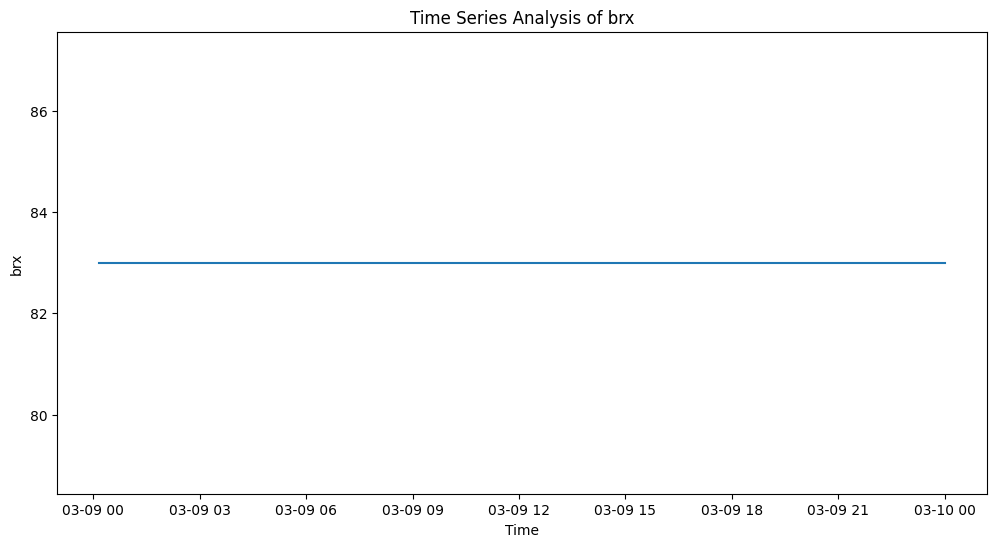

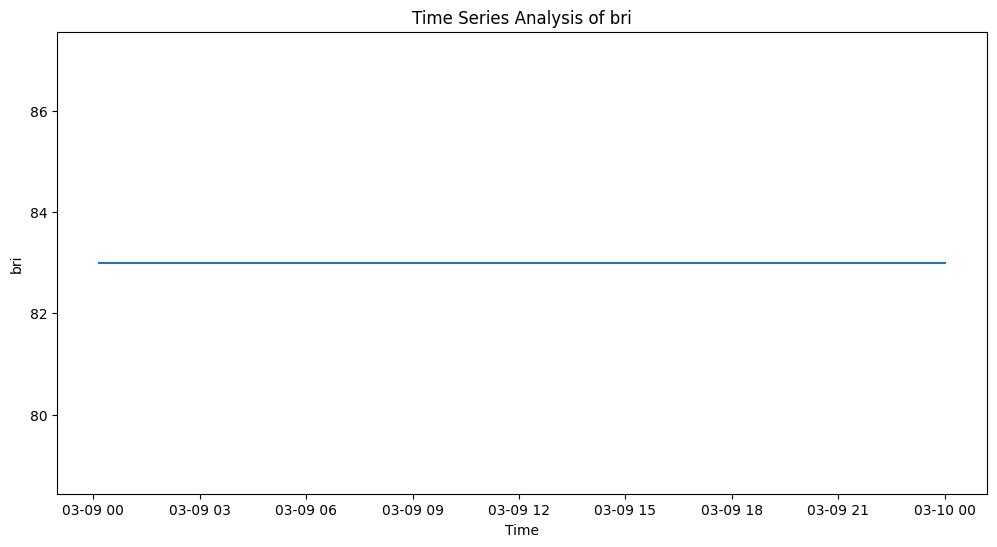

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

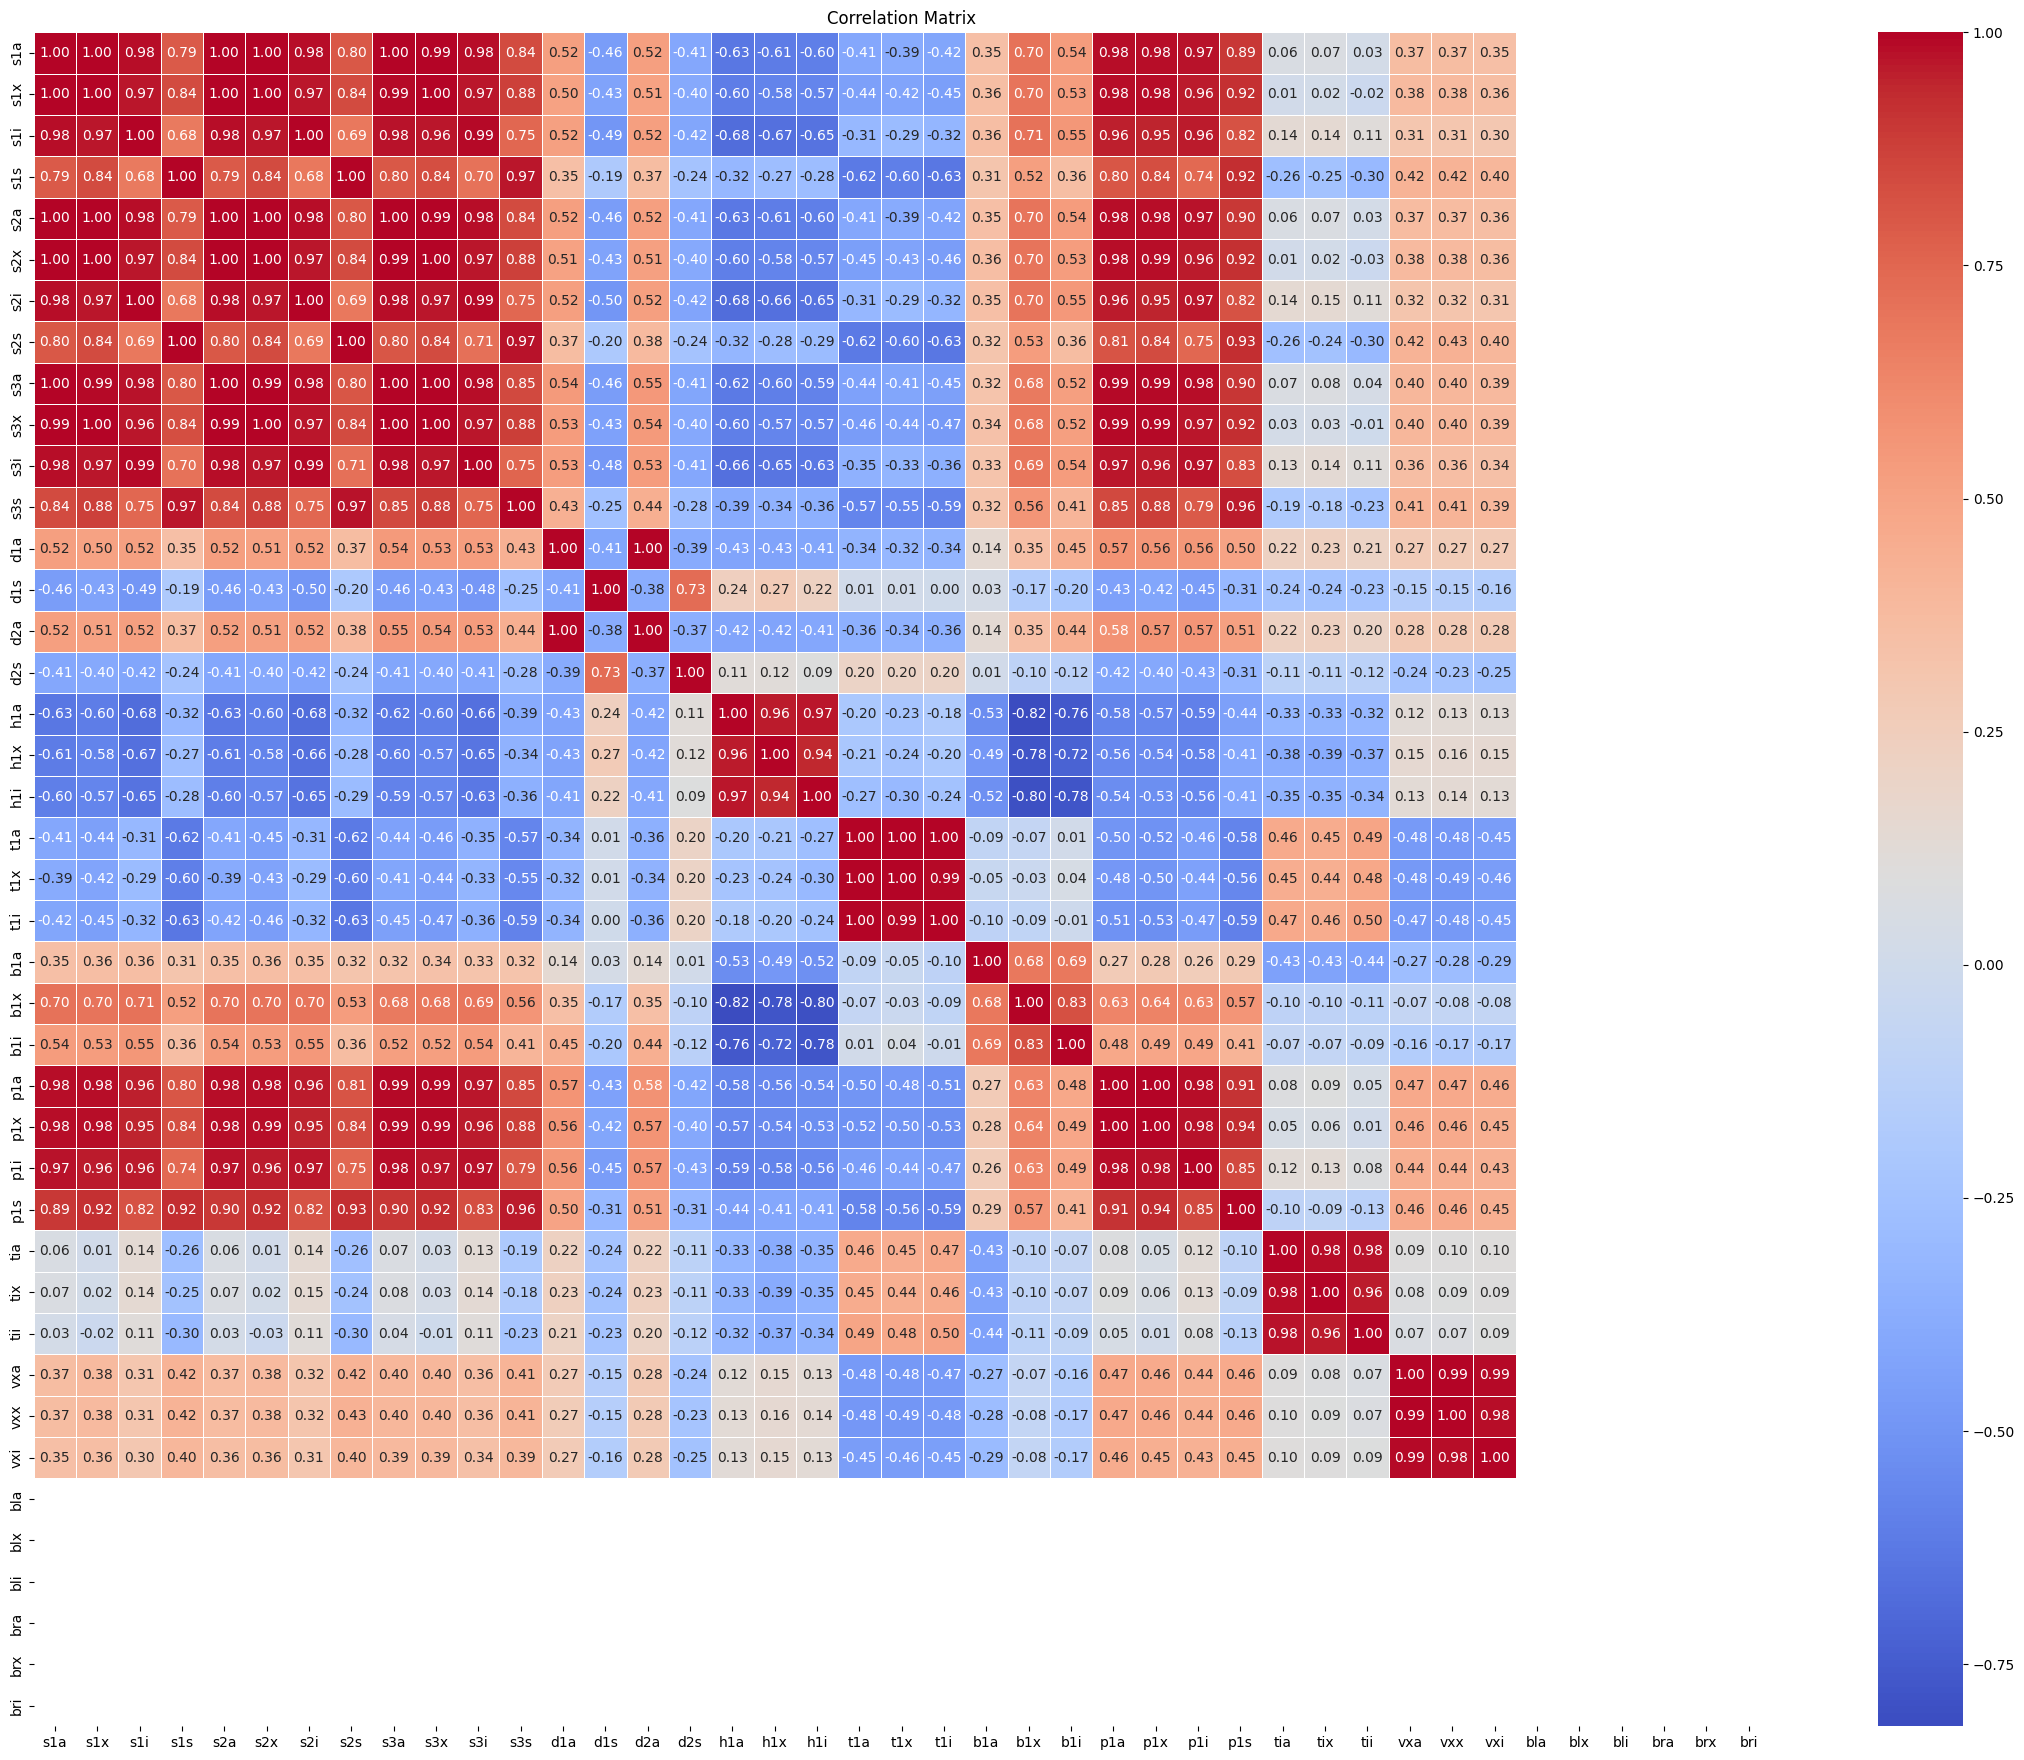

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

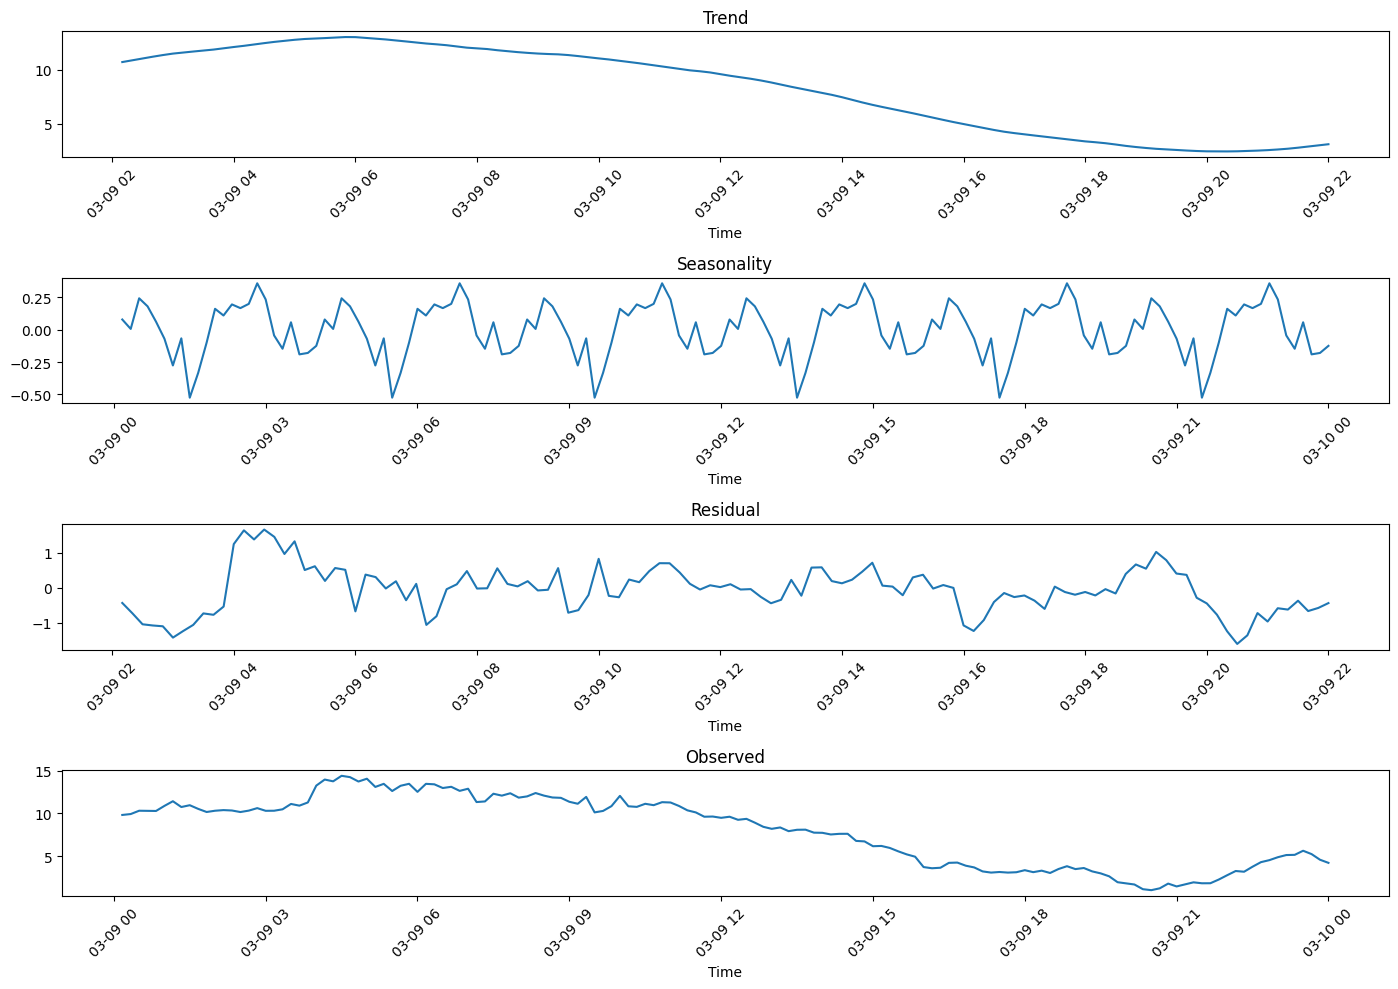

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


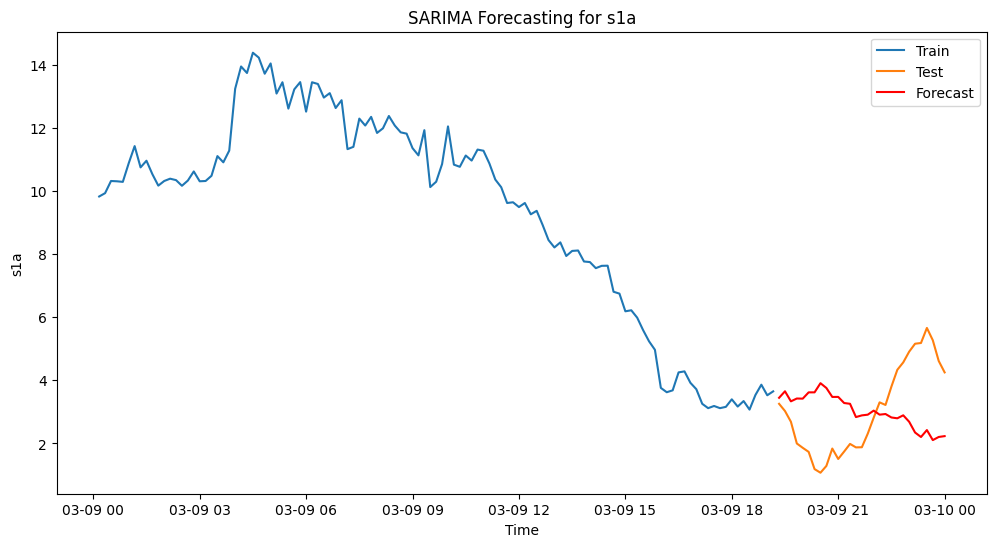

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()